In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
* 분석을 통해 가설을 검정하기

# 라이브러리 로드

In [2]:
import pandas as pd # 분석
import numpy as np # 수치계산
import seaborn as sns # 시각화
import matplotlib.pyplot as plt
# 구 버전의 주피터 노트북에서는 %matplotlib inline 설정이 되어야 노트북 안에서 그래프를 시각화함
%matplotlib inline

# 한글폰트 설정

In [3]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보임 -> 한글이 출력될 수 있도록 폰트 설정
# 운영체제별 설정을 위해 로드
import os
if os.name == "posix" : # Mac 사용자라면
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = "retina"

# 데이터 불러오기
* 건강검진정보(2017) 다운로드 받기

In [5]:
df = pd.read_csv("C:/data/NHIS_OPEN_GJ_2017.csv", encoding="cp949")
df.shape

(1000000, 34)

## 데이터 미리보기

In [6]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


In [7]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,27.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,15.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999999,2017,1000000,1,11,41,160,70,90.5,1.0,1.5,...,36.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [8]:
df.sample() # 한 개만 랜덤하게 가져옴

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
355693,2017,355694,2,14,31,155,60,83.0,1.0,0.9,...,22.0,1.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


# 기본정보 보기

In [9]:
df.info() # 데이터 결측치 살펴보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [10]:
# 컬럼만 따로 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [11]:
# 데이터 형식만 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

# 결측치 보기

In [12]:
True + True + False

2

In [13]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어줌
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [14]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수 집계할 수 있음
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

<AxesSubplot:>

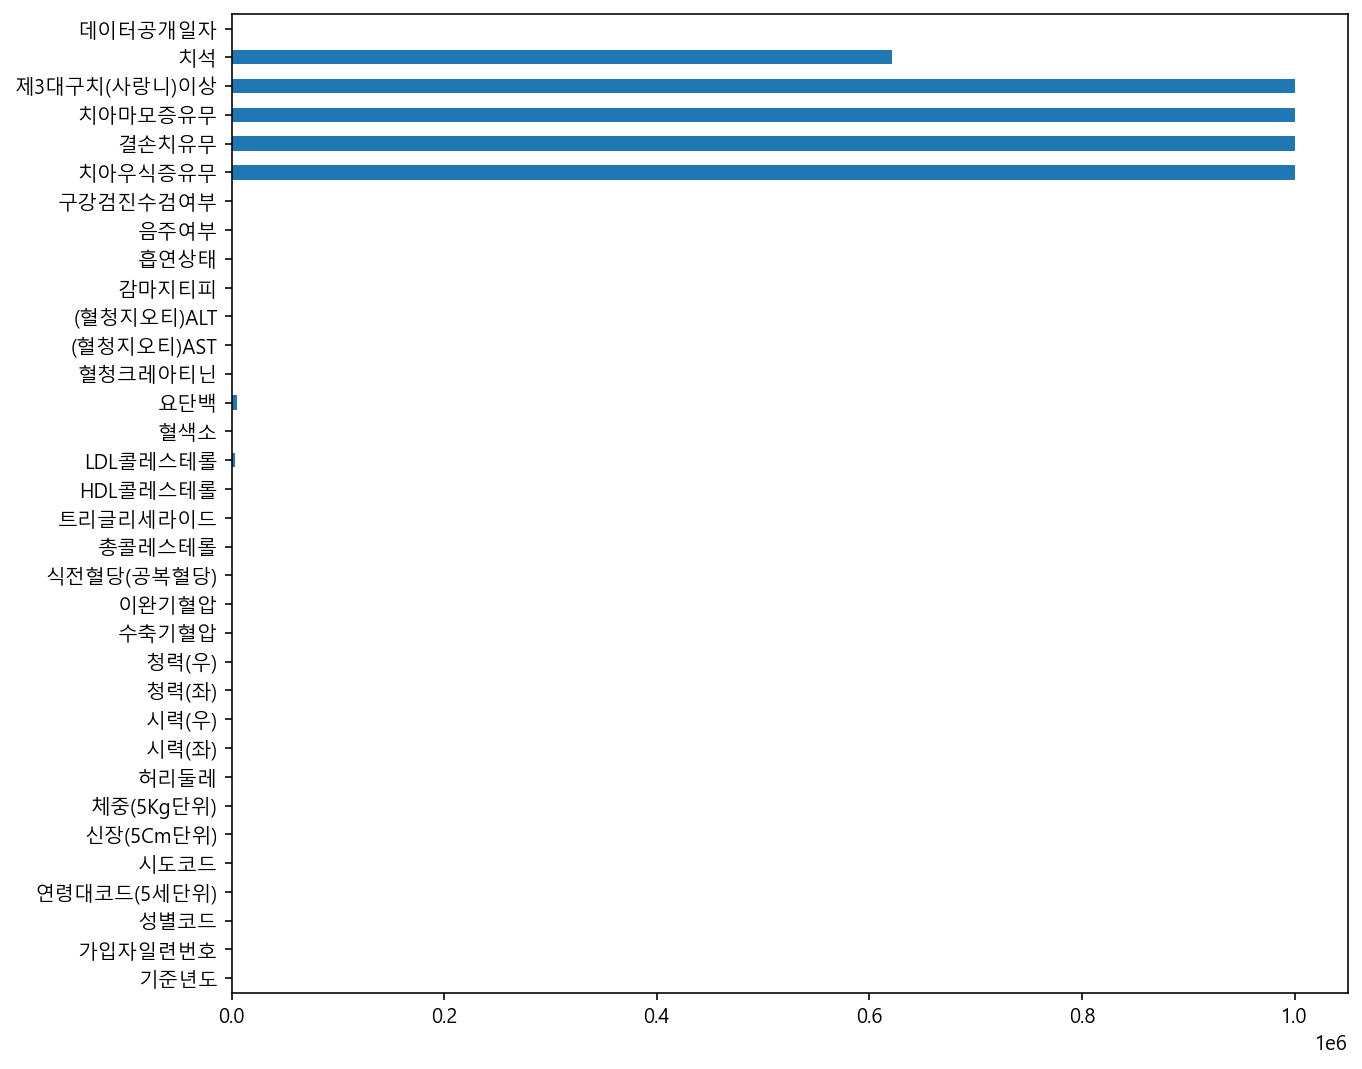

In [15]:
# 판다스에 내장 된 plot을 통해 시각화
df.isnull().sum().plot.barh(figsize=(10, 9))

# 일부 데이터 요약하기

In [16]:
# 여러 컬럼 가져오기 -> 리스트 형태 []로 감싸주기 (데이터프레임 형태)
# "(혈청지오티)ALT", (혈청지오티)AST" 를 가져와 미리보기
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0


In [17]:
# "(혈청지오티)ALT", (혈청지오티)AST" 를 요약
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


# value_counts로 값 집계하기

In [18]:
# 성별코드로 그룹화하고 갯수를 집계
df["성별코드"].value_counts() # 남성데이터가 더 많음을 알 수 있음

1    530410
2    469590
Name: 성별코드, dtype: int64

In [19]:
# 흡연상태로 그룹화하고 갯수를 집계 - 1: 흡연, 3: 금연, 2: 흡연했다가 금연
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# groupby와 pivot_table 사용하기

## groupby

In [20]:
# 성별코드로 그룹화 한 데이터를 세어보기
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [21]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어보기
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [22]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구하기
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean() # 음주하고 있는 사람들의 수치가 더 높은 것을 확인

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [23]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치 구하기
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [24]:
# agg를 사용하면 여러 수치를 함께 구할 수 있음
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

## pivot_table

In [25]:
# 음주여부에 따른 그룹화된 수를 피벗테이블로 구하기
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")
# groupby와 결과는 같지만 groupby는 시리즈 형태로 출력됨, 속도가 더 빠름
# 그러나 직관적으로 pivot_table이 좋음

,가입자일련번호
음주여부,
N,500439
Y,499025


In [26]:
# 음주여부에 따른 감마지티피의 평균 구하기
pd.pivot_table(df, index="음주여부", values="감마지티피") # 기본적으로 평균값 구함

,감마지티피
음주여부,
N,26.819650
Y,47.588675


In [27]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정해 줄 수도 있음
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc='mean')

,감마지티피
음주여부,
N,26.819650
Y,47.588675


In [28]:
# aggfunc에 여러 값을 한번에 지정할 수도 있음
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"]) # 평균값과 중앙값 비교

,mean,median
,감마지티피,감마지티피
음주여부,,
N,26.819650,19.0
Y,47.588675,30.0


In [29]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수도 있음
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
N,14.0,19.0,29.0,500417.0,999.0,26.819650,1.0,30.639714
Y,18.0,30.0,52.0,499005.0,999.0,47.588675,1.0,63.056912


In [30]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구함
pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    N     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     Y     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    N     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     Y     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 전체 데이터 시각화하기
* 100만개가 넘는 데이터를 시각화를 할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는 것을 권장
* 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴수도 있음

## 히스토그램
* 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진 것을 확인할 수 있음
* 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화해서 도수분포표를 만들고 그 결과를 시각화
* 이 데이터는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그림

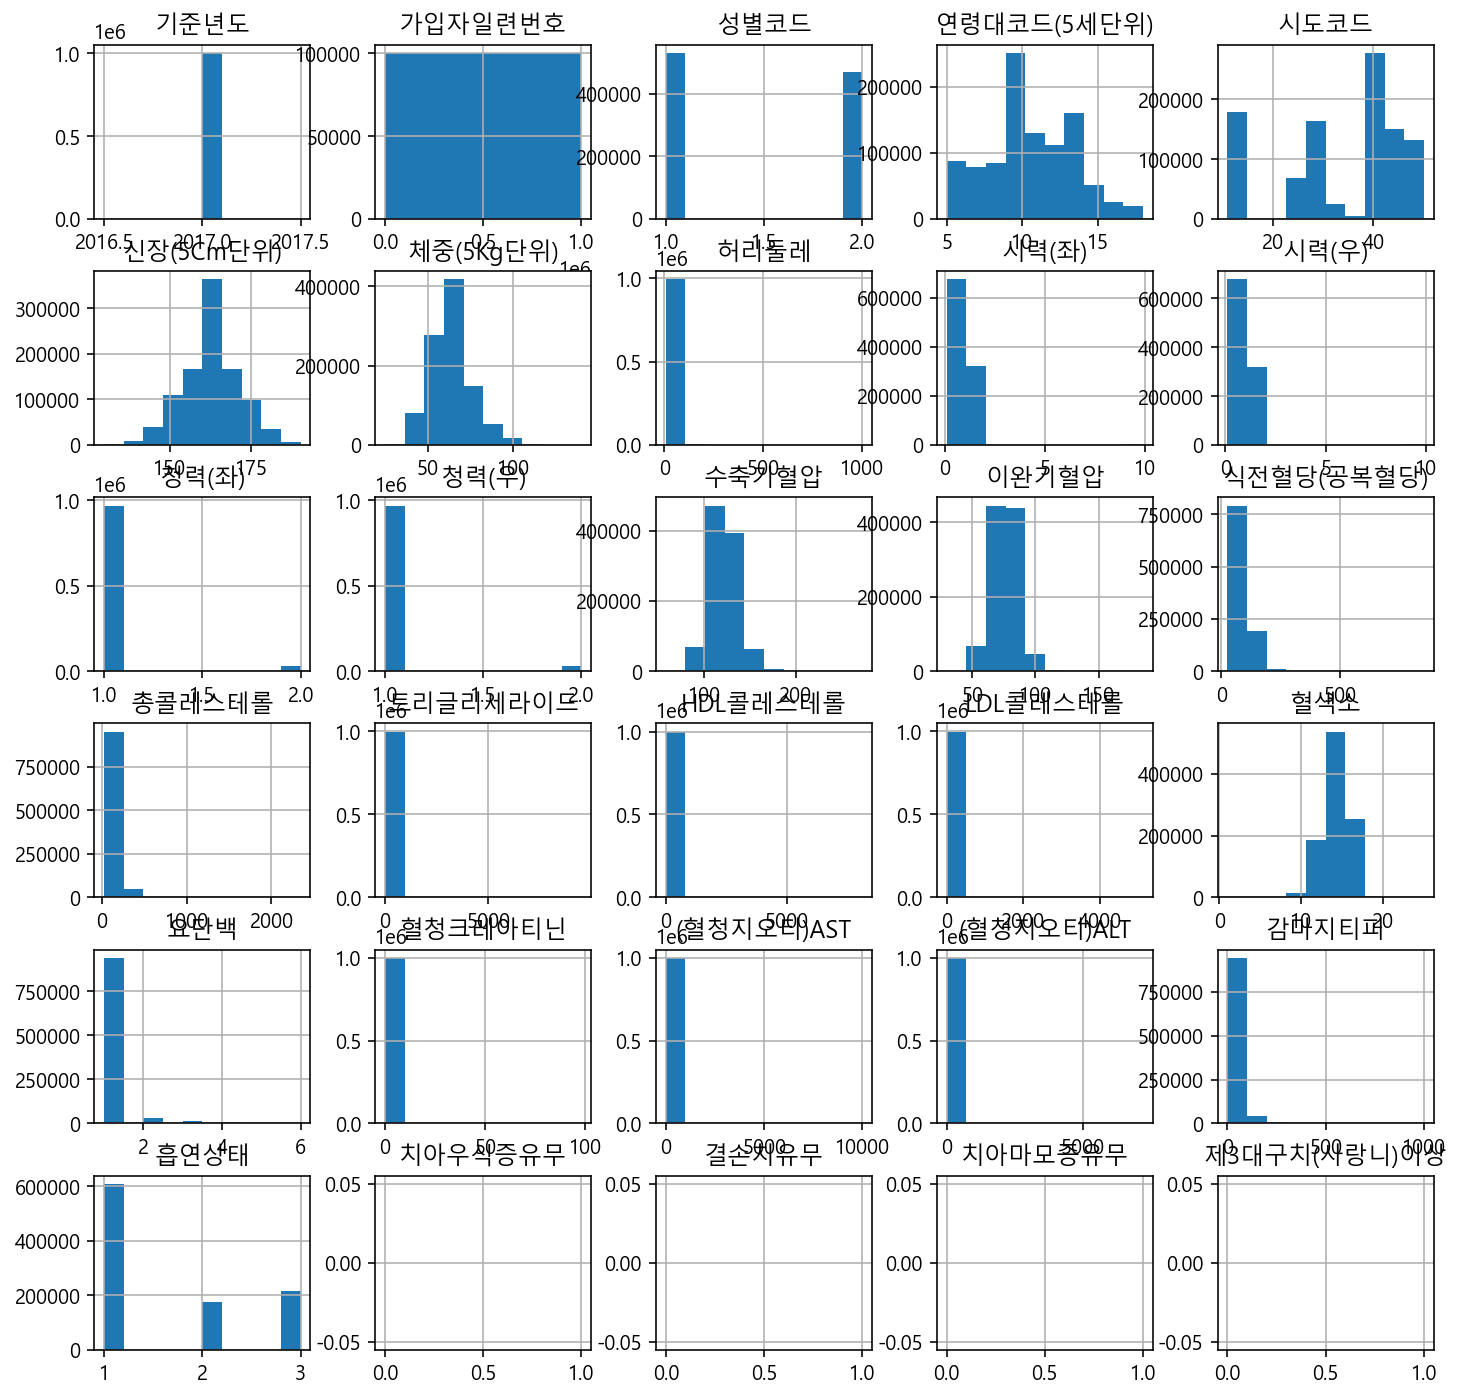

In [31]:
# 전체 데이터에 대한 히스토그램을 출력
h = df.hist(figsize=(12, 12)) # 변수에 할당을 하면 출력되는 결과가 없이 깔끔하게 출력

## 슬라이싱을 사용해 히스토그램 그리기
* 슬라이싱 기능을 사용해서 데이터를 나누어 그림
* 슬라이싱 사용 시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능
* iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:, :]을 사용
* 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)를 지정할 수 있음

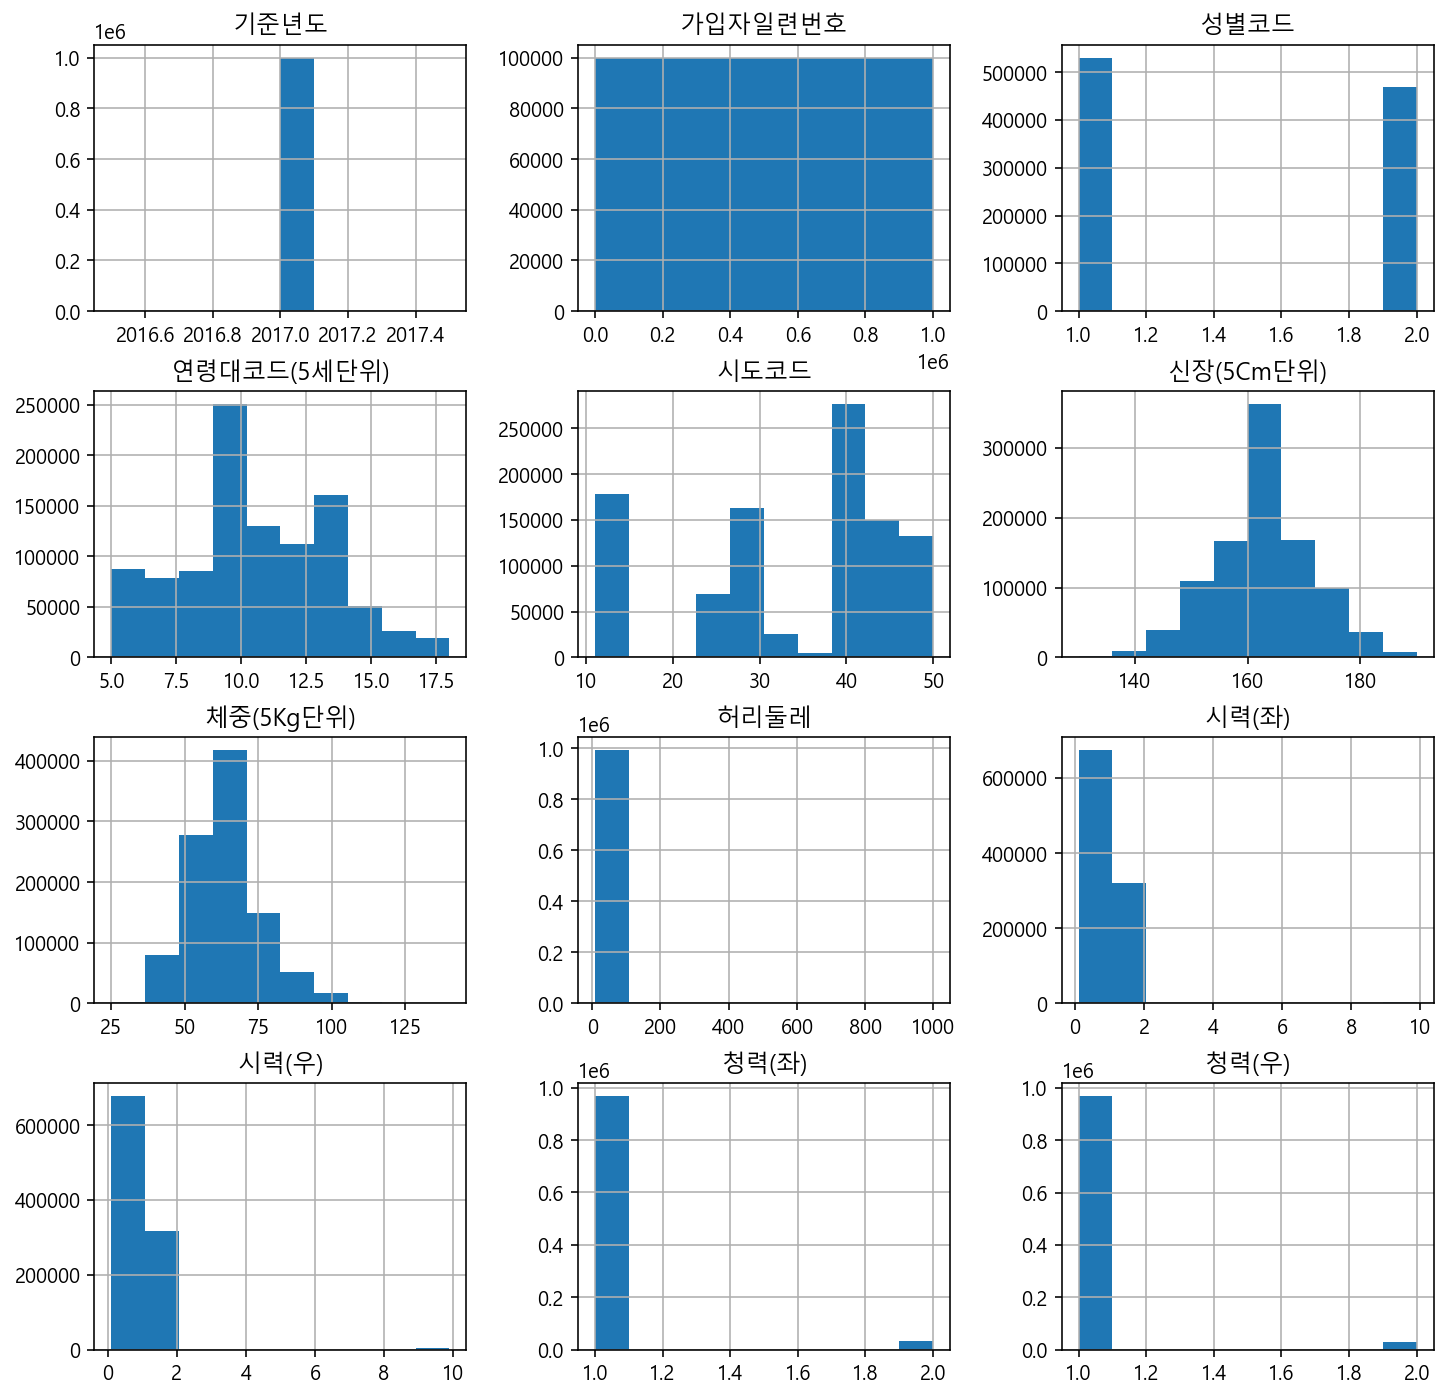

In [32]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그리기
# [행, 열]
h = df.iloc[:, :12].hist(figsize=(12, 12))

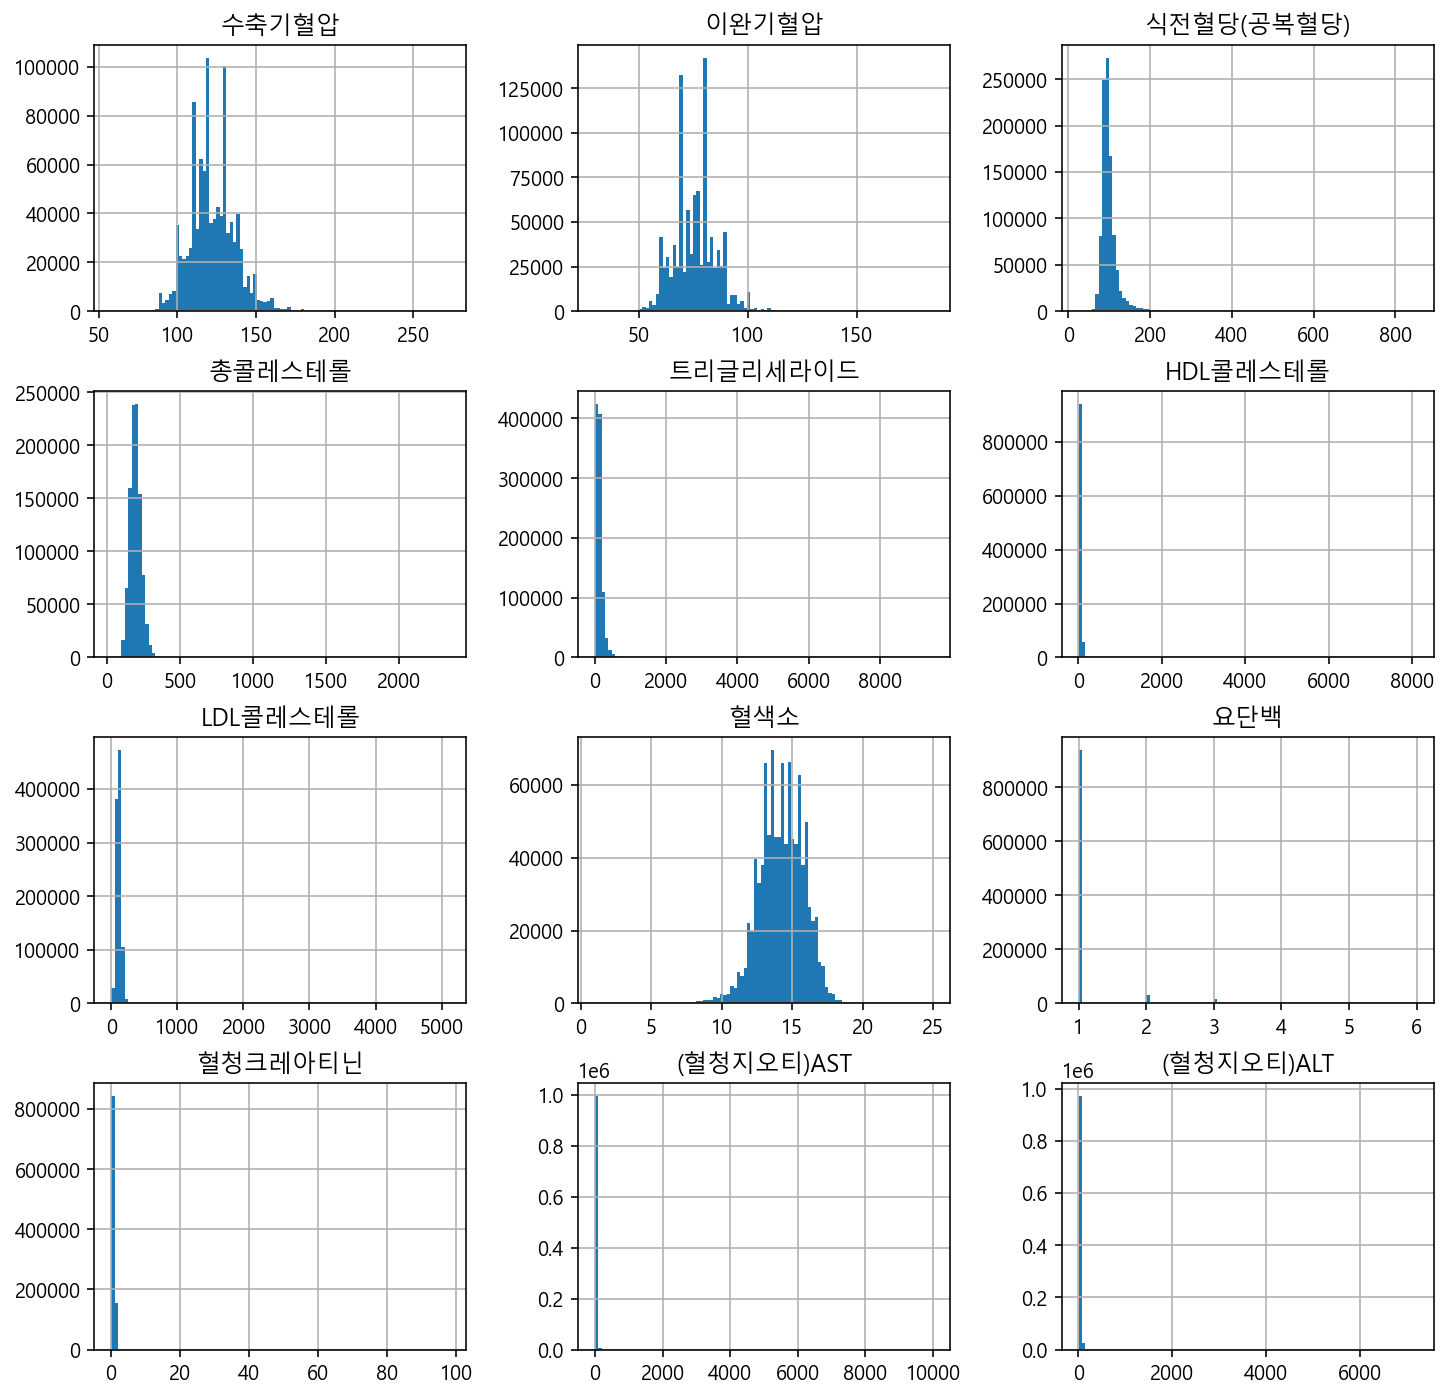

In [33]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지 (12:24) 컬럼에 대한 데이터로 히스토그램을 그리기
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100) # bins: 막대의 개수 -> 값의 분포를 자세하게 볼 수 있음

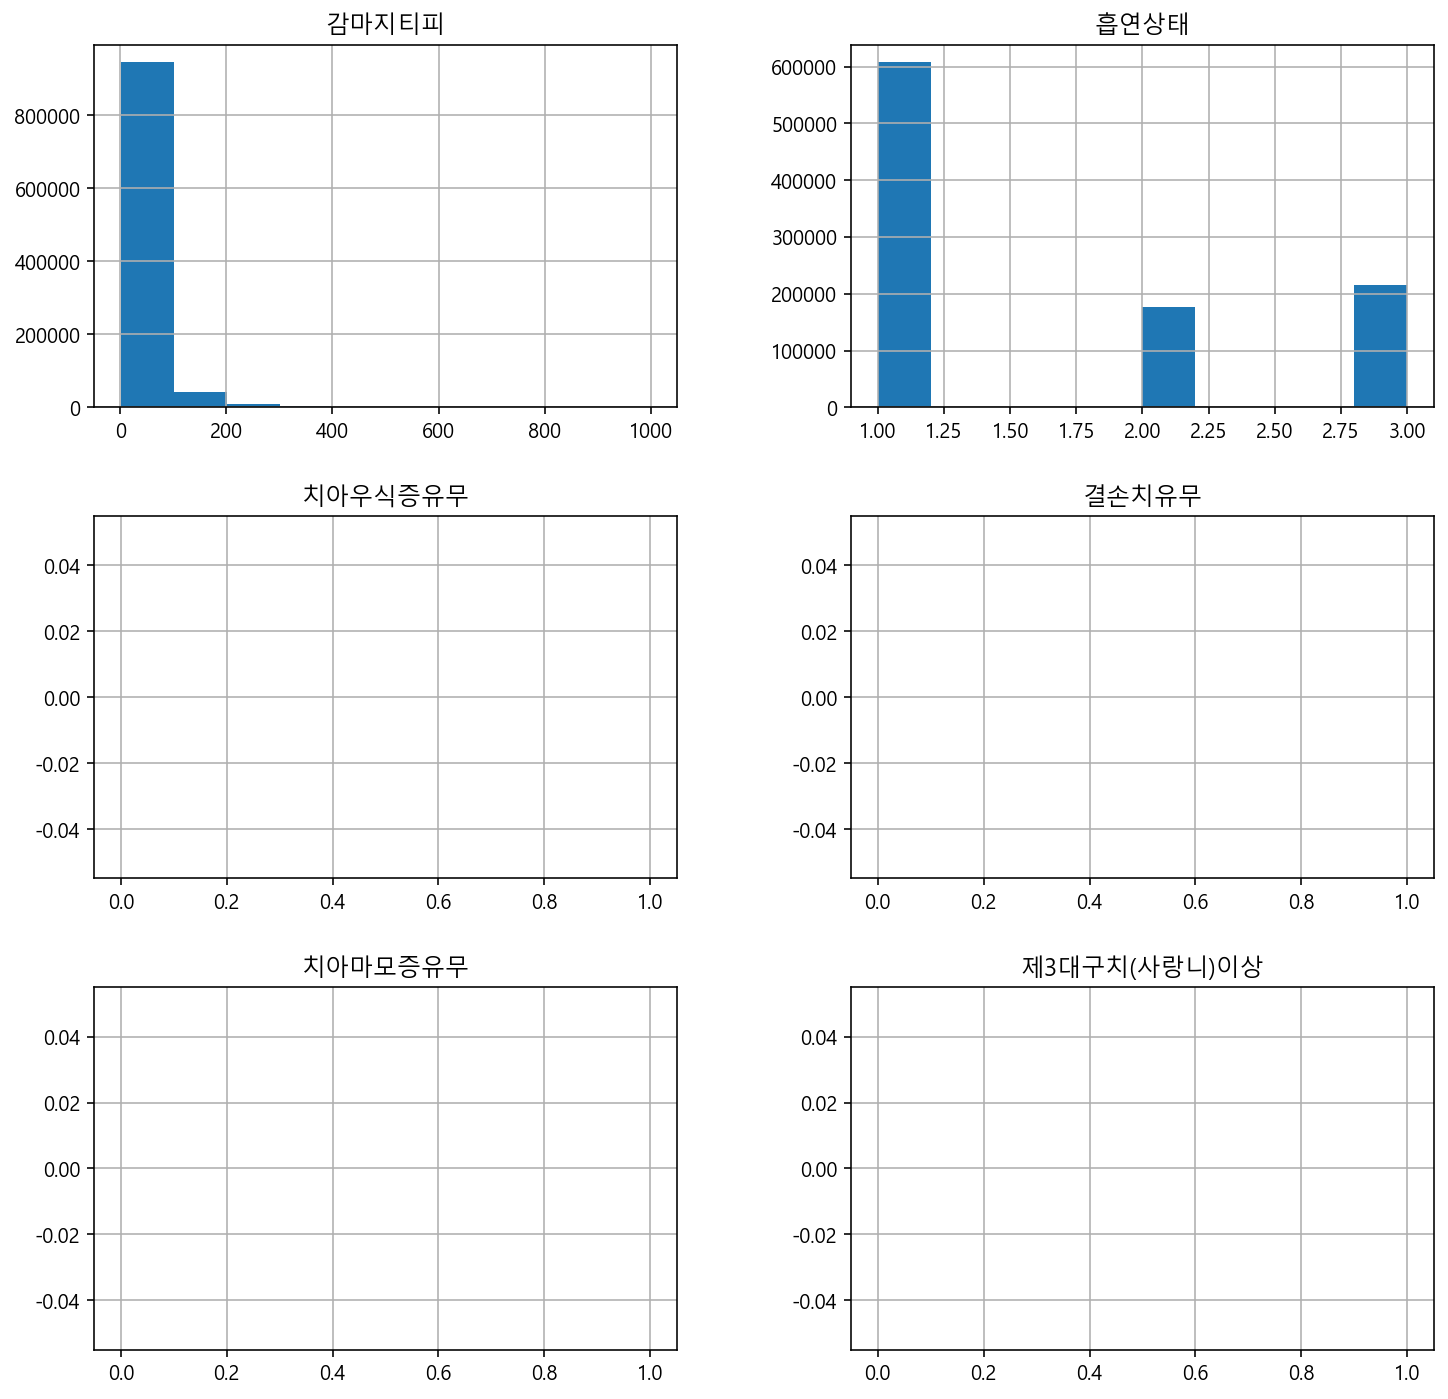

In [34]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지 (24:) 컬럼에 대한 데이터로 히스토그램을 그리기
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=10)

# 샘플데이터 추출하기
* seaborn의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래 걸림
* 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용

In [35]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출
# random_state를 사용해 샘플링되는 값을 고정할 수 있음 -> 실험을 통제하기 위해 고정하기도함
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

# 데이터 시각화 도구 Seaborn 사용하기
* https://seaborn.pydata.org/
* seaborn은 https://matplotlib.org/을 사용하기 쉽게 만들어졌으며, 간단하게 고급 통계 연산을 할 수 있음

# 범주형(카테고리) 데이터 시각화
* countplot은 범주형 데이터의 수를 더한 값으로 그래프로 표현함
* value_counts로 구한 값을 시각화한다고 보면 됨

## countplot-음주여부

<AxesSubplot:>

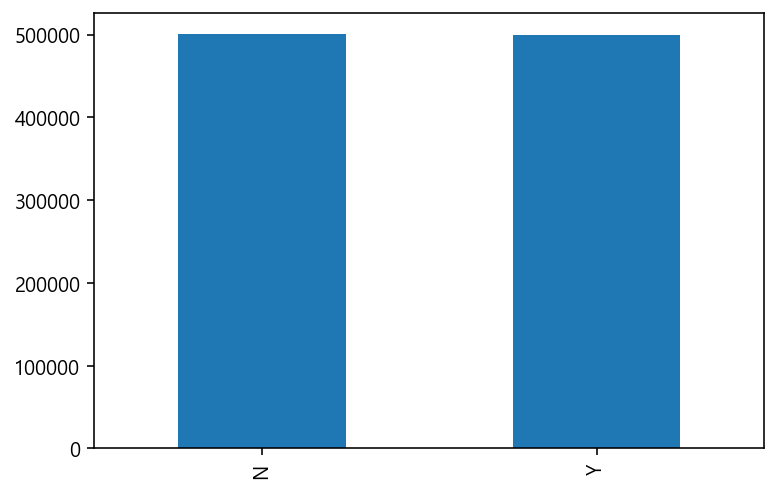

In [36]:
# 음주여부에 따른 countplot 그리기
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

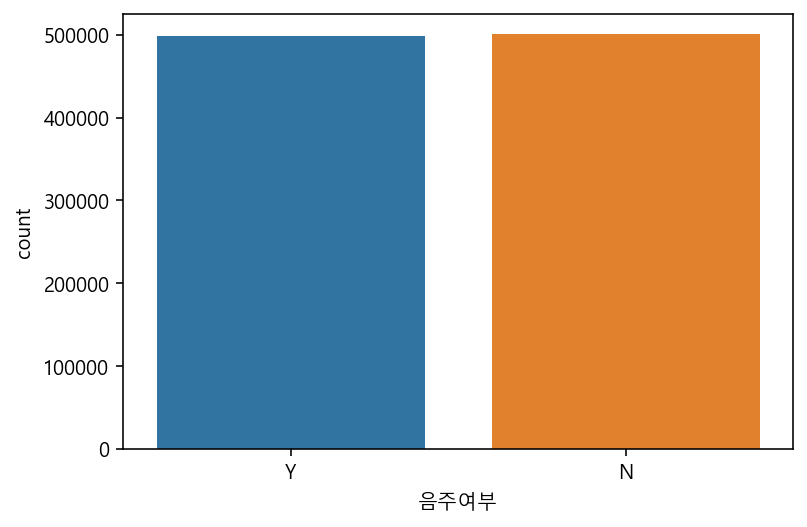

In [37]:
sns.countplot(x="음주여부", data=df) # 위와 달리 연산없이 그래프를 그릴 수 있음

## hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

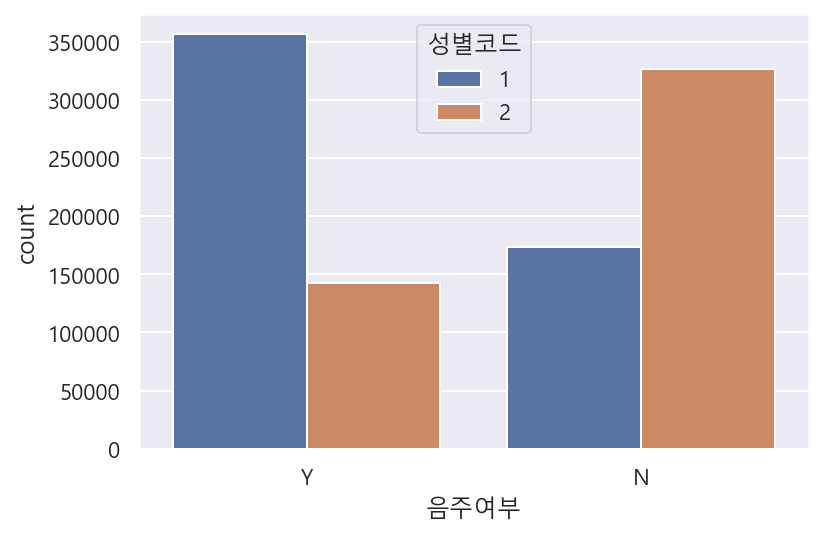

In [38]:
# 음주여부에 따른 countplot을 그리고 hue를 사용해 성별코드로 색상을 구분해 그리기
# 또, seaborn에서 제공하는 폰트 설정을 사용할 수도 있음
sns.set(font_scale=1, font="Malgun Gothic") # Window
sns.countplot(data=df, x="음주여부", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

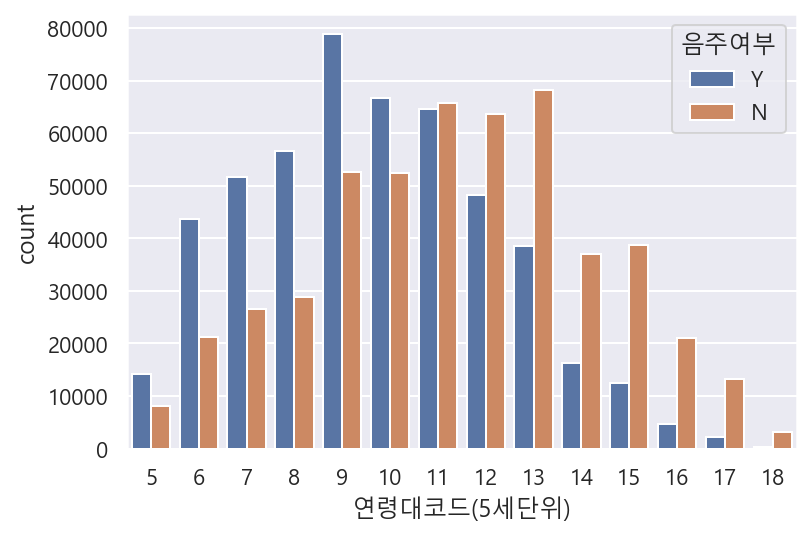

In [39]:
# countplot으로 연령대별 음주여부 보기
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

## countplot - 키와 몸무게
* 키와 몸무게는 연속형 데이터라고 볼 수 있음
* 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있음
* 이렇게 특정 범위로 묶게 되면 연속형 데이터라기보다는 범주형 데이터라고 볼 수 있음

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

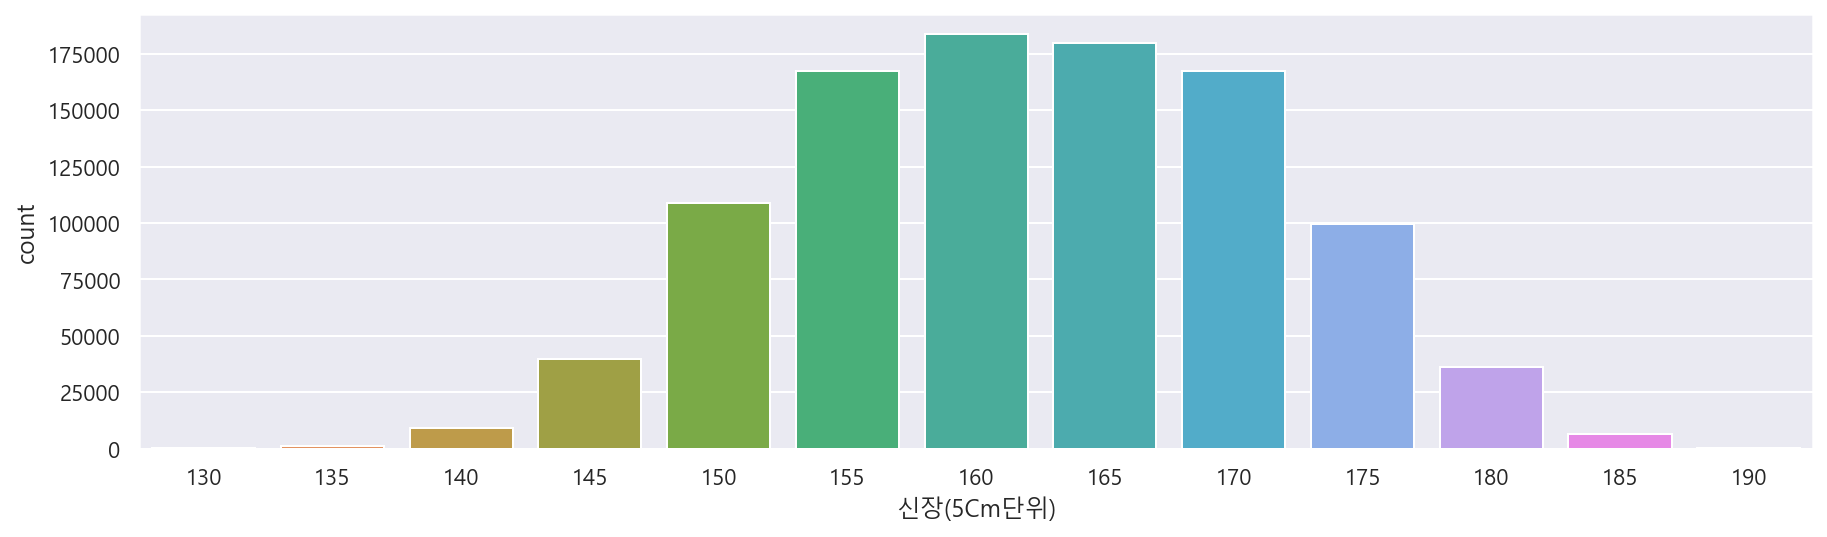

In [40]:
# countplot으로 키를 보기
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

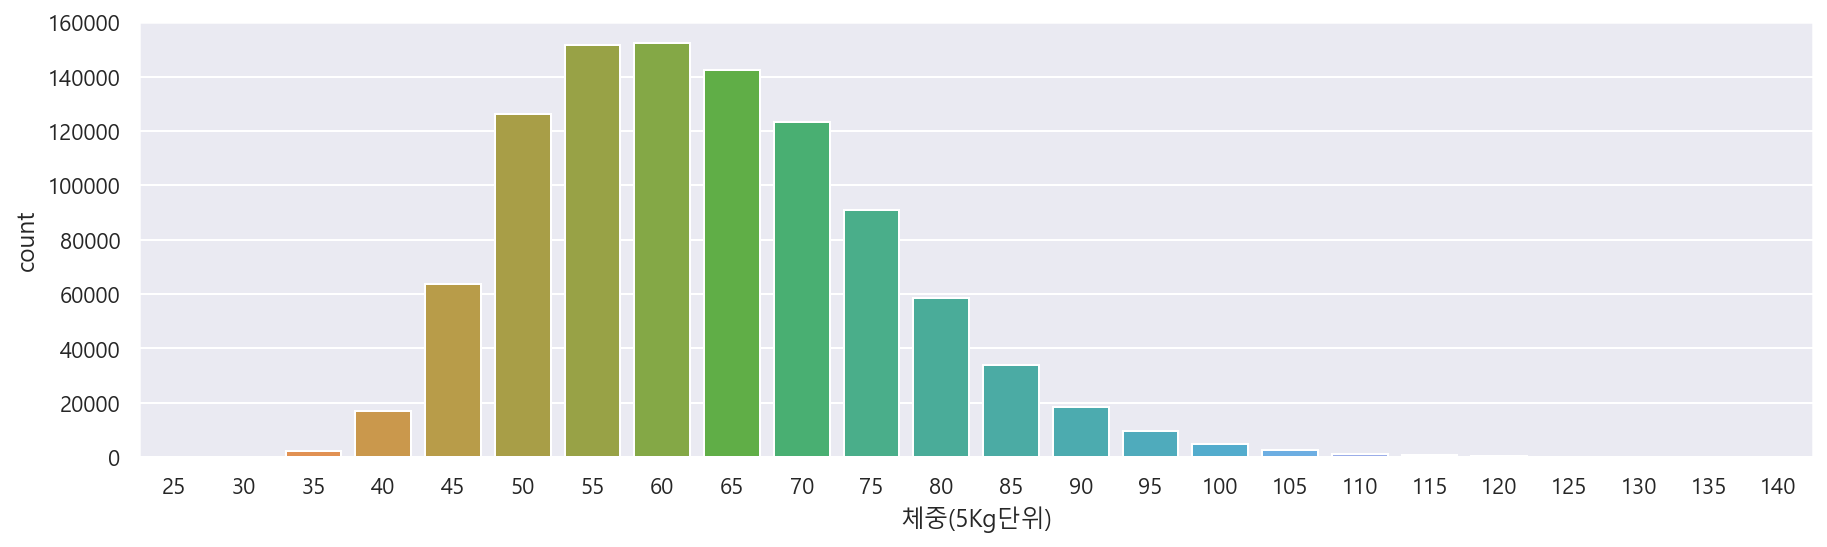

In [41]:
# countplot으로 체중을 보기
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

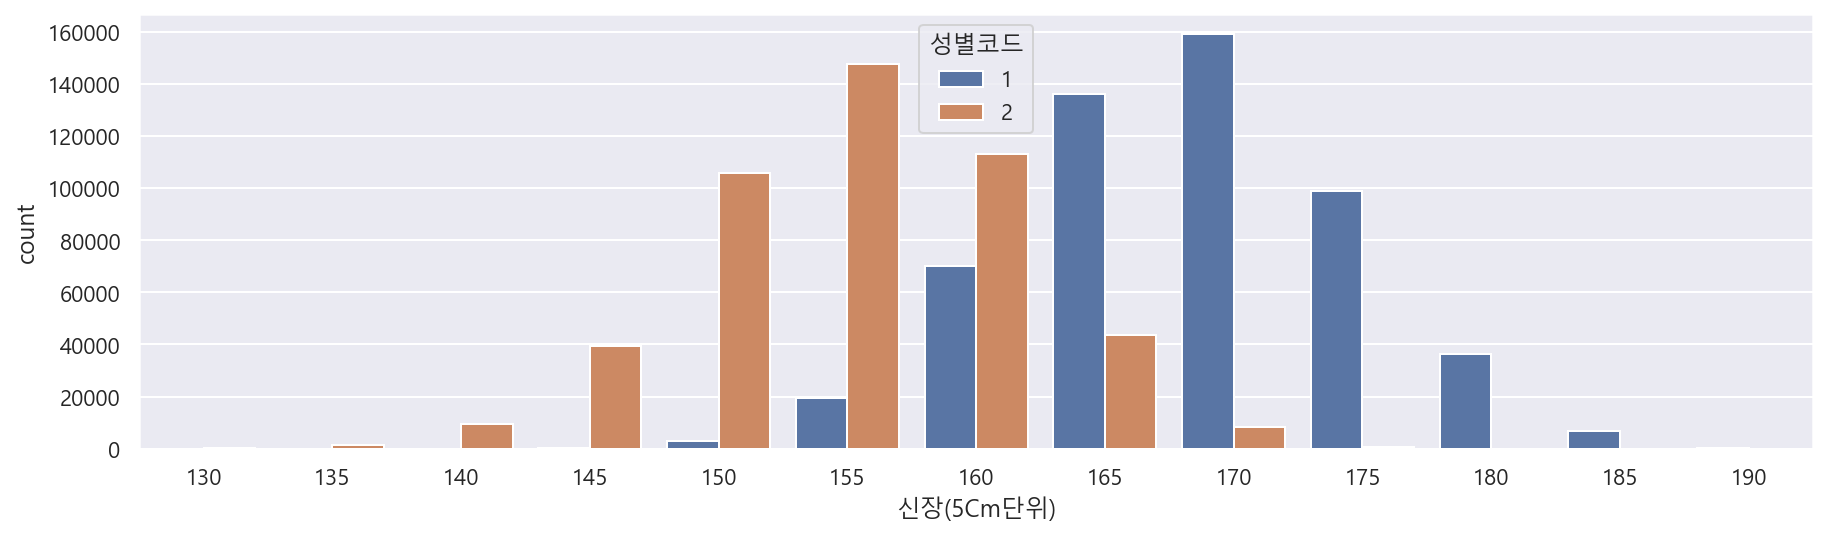

In [42]:
# countplot으로 신장(5Cm단위)를 보기
# 성별에 따른 키의 차이를 보기
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

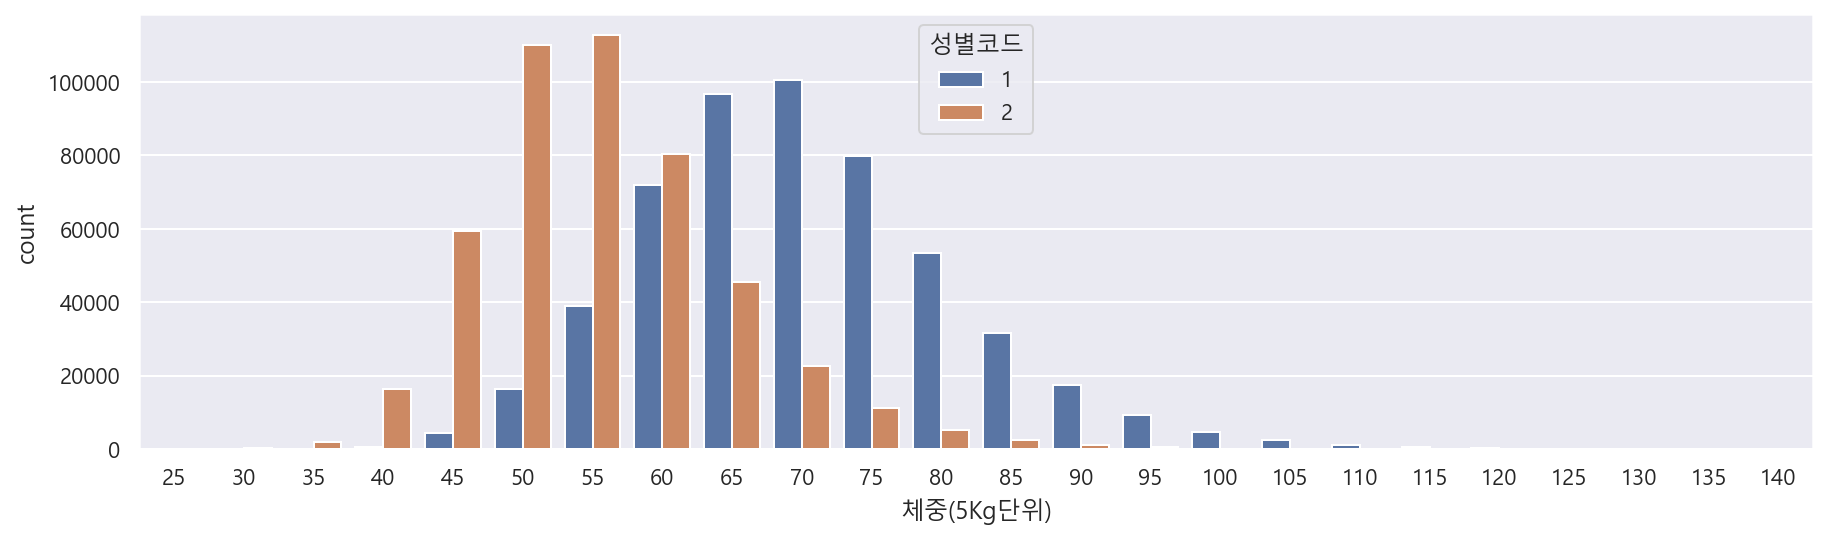

In [43]:
# 성별에 따른 체중의 차이 보기
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

## barplot - 수치형 vs 범주형 데이터 시각화

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

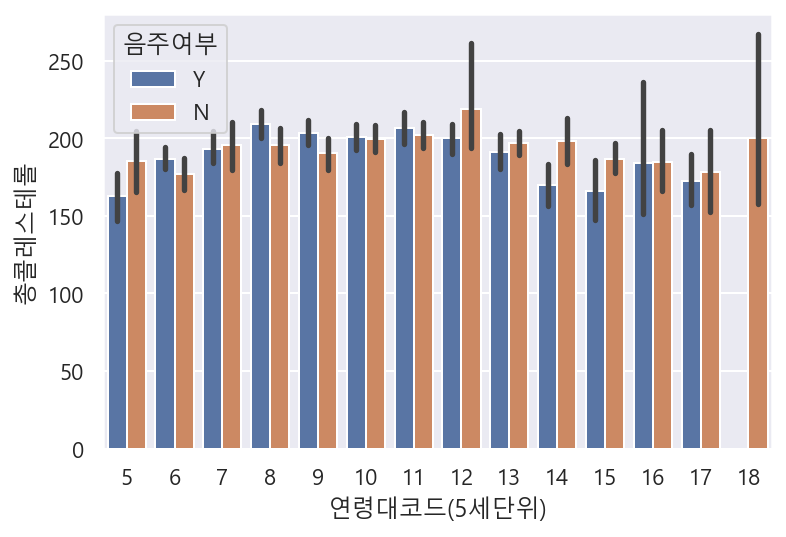

In [44]:
# 콜레스테롤과 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그리기
# 검정막대 : 신뢰구간을 의미
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부") # 음주여부에 따라서

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

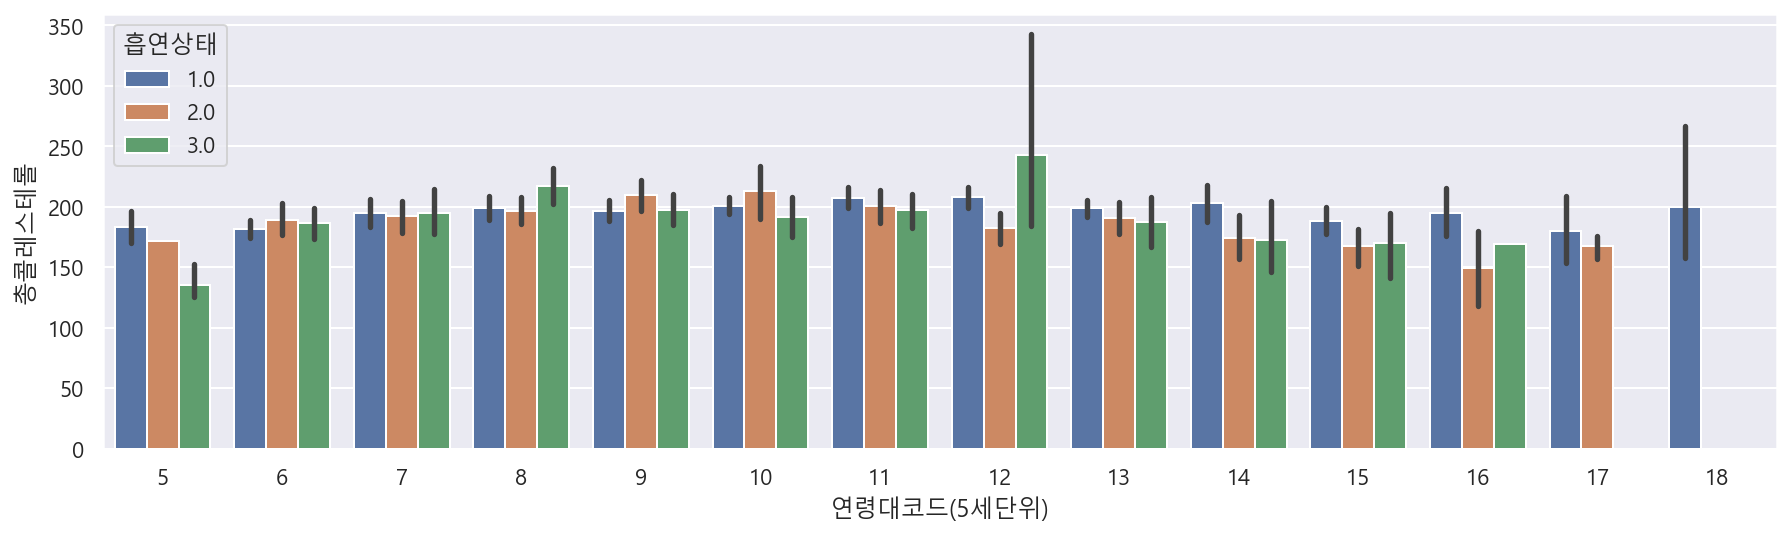

In [45]:
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그리기
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태") # 흡연상태에 따라서

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

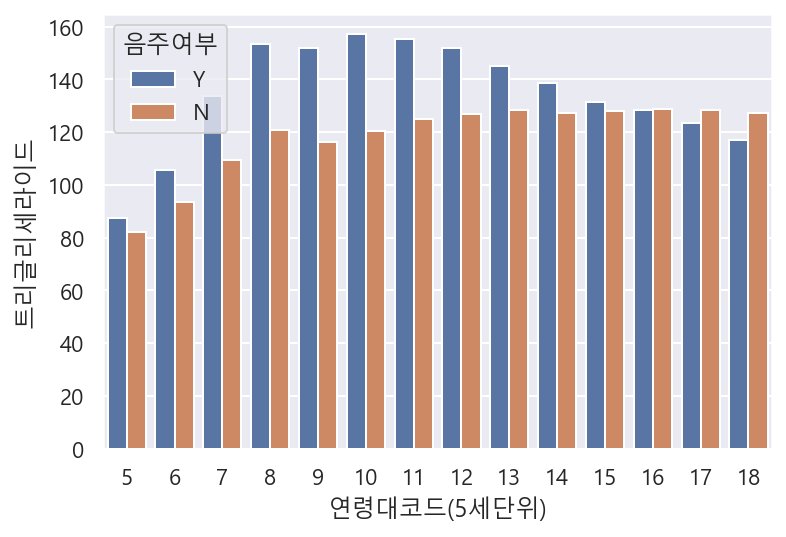

In [46]:
# 트리글리세라이드(중성지방) 에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그리기
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None) # ci : 신뢰구간 표시 (default : 95)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

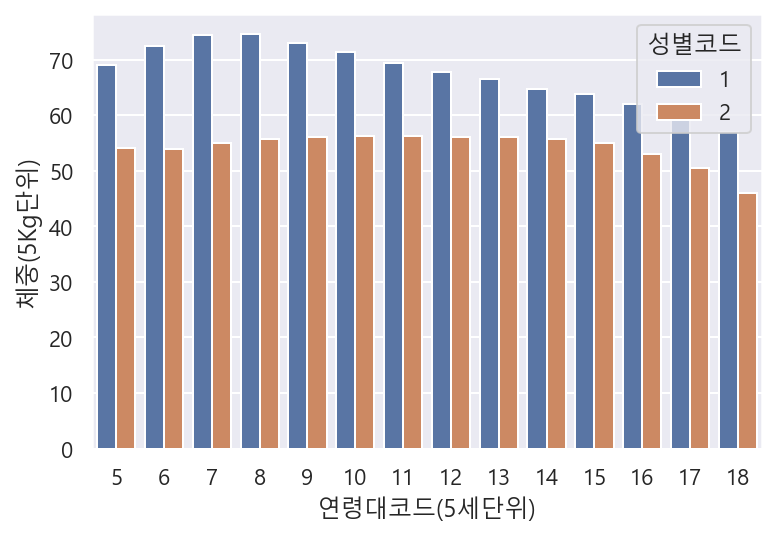

In [47]:
# 연령대코드와 체중(5Kg 단위)을 성별에 따라 barplot으로 그리기
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

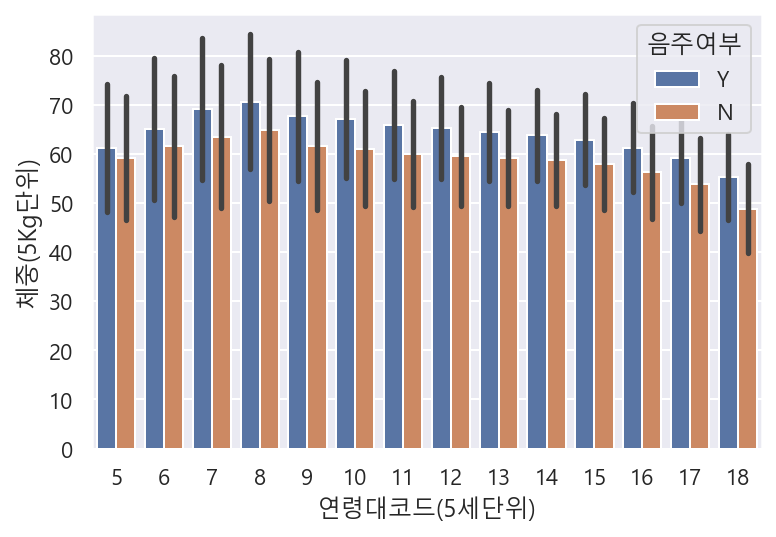

In [48]:
# 연령대코드와 체중(5Kg 단위)을 음주여부에 따라 barplot으로 그리기
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci="sd") # 표준편차 그리기

## lineplot and pointplot

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

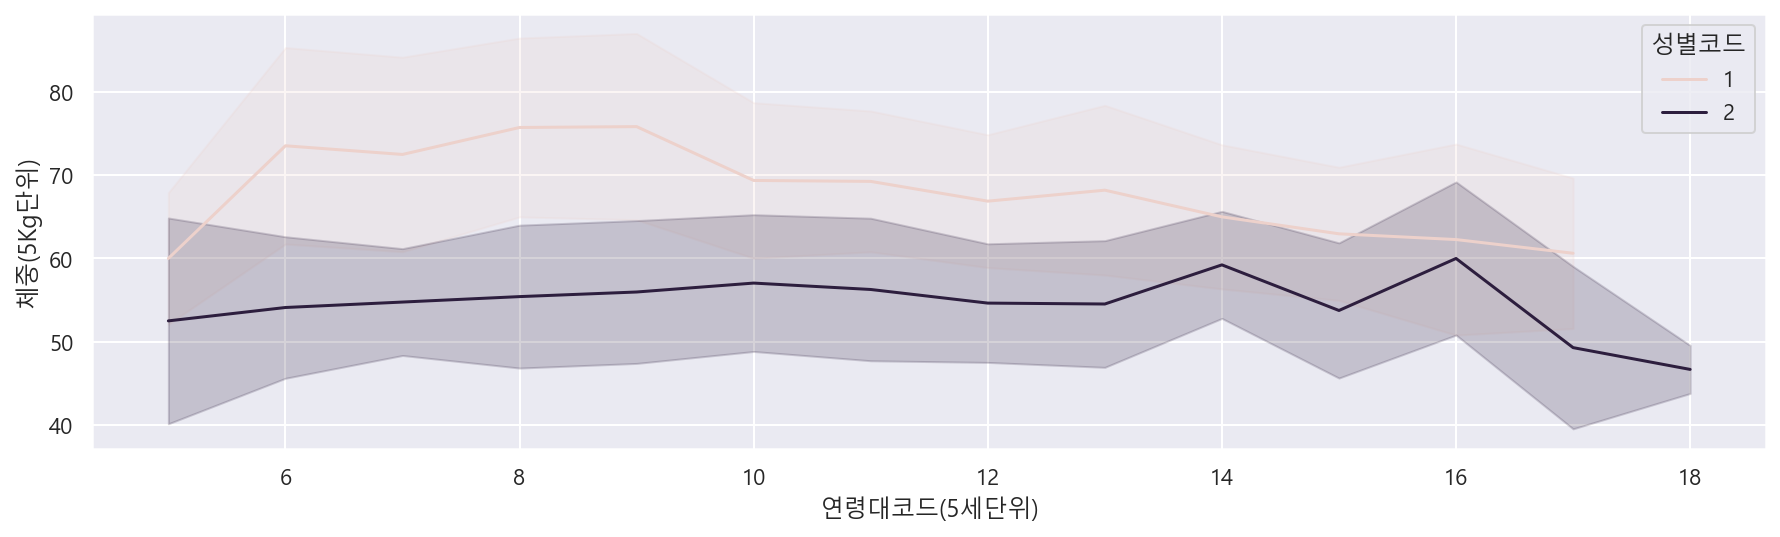

In [49]:
# 연령대코드(5세단위)에 따른 체중(5Kg 단위)을 성별코드에 따라 lineplot으로 그리기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci="sd") # 표준편차가 그림자로 나타남
# 연령대가 높아질수록 체중에 평균적으로 낮아진다는 것을 알 수 있음

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

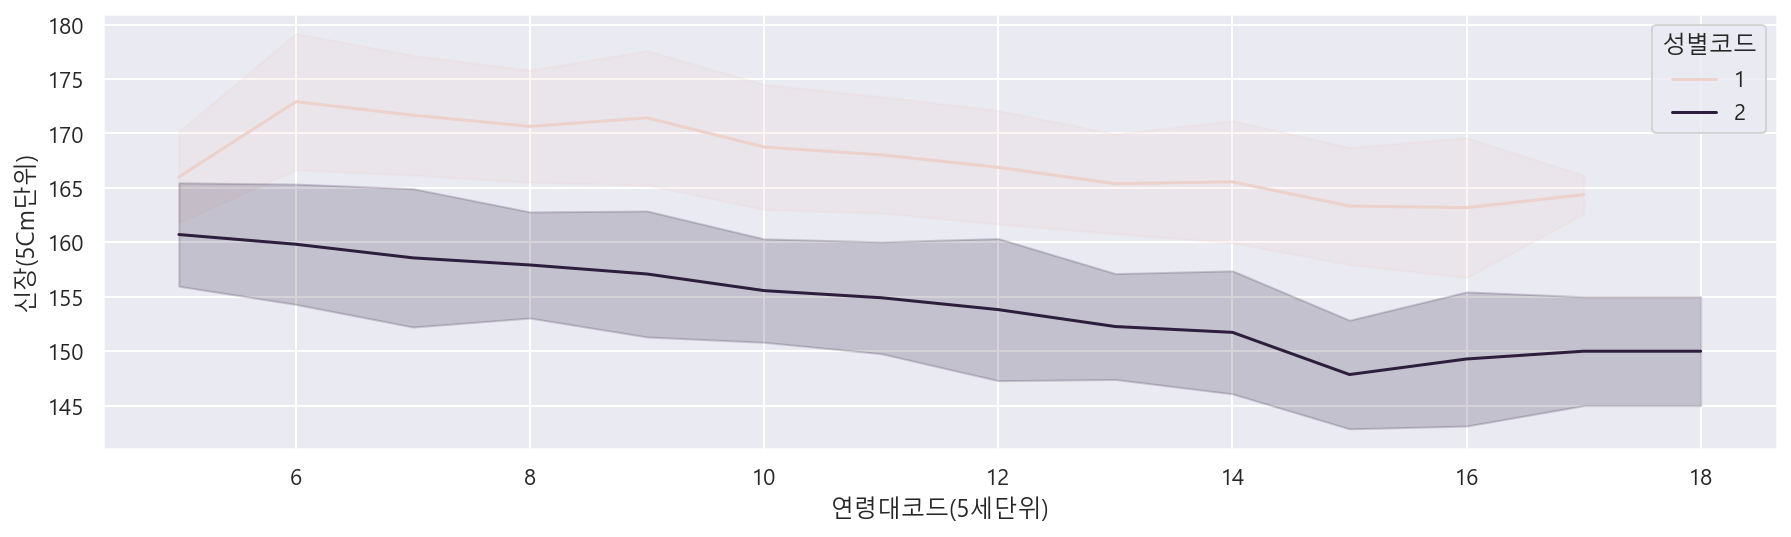

In [50]:
# 연령대코드(5세단위)에 따른 신장(5Cm 단위)을 성별코드에 따라 lineplot으로 그리기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

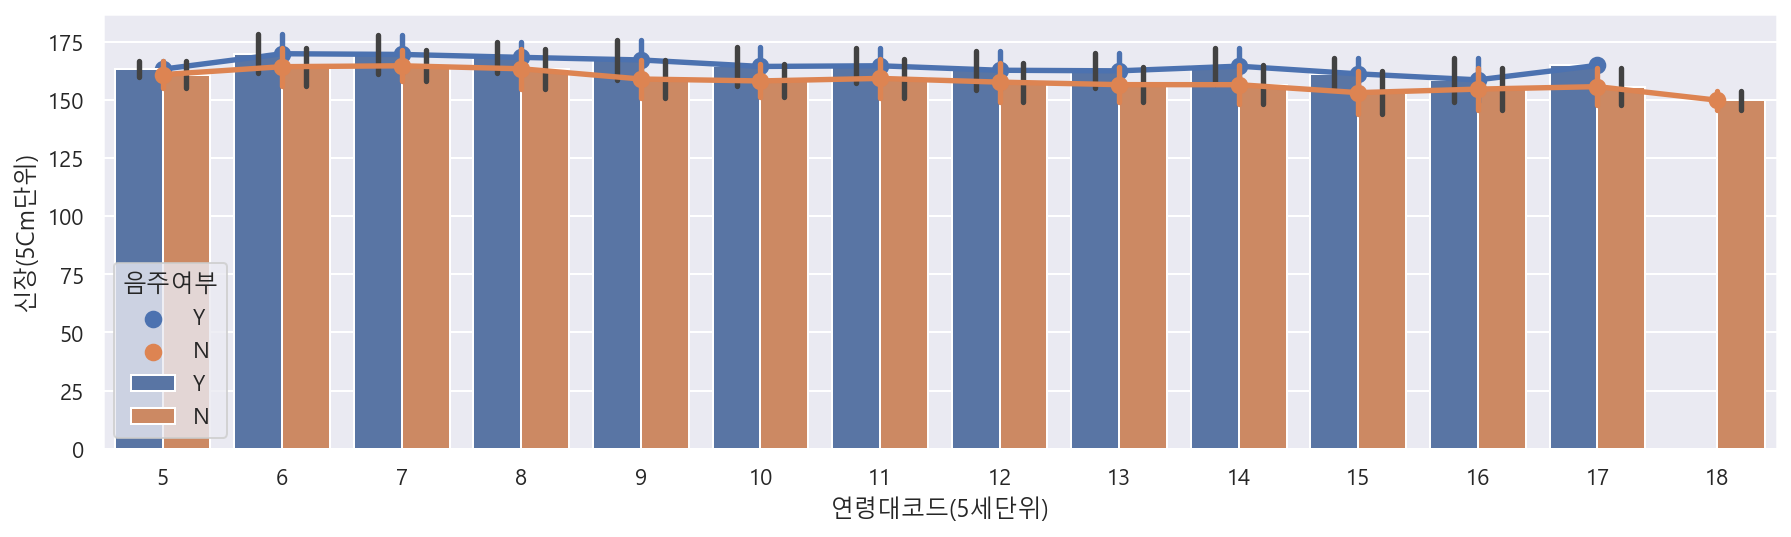

In [51]:
# 연령대코드(5세단위)에 따른 신장(5Cm단위)을 음주여부에 따라 pointplot과 barplot으로 그리기
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
# pointplot과 barplot 두 개를 겹쳐서 그릴 수도 있음
# 음주하는 사람이 키가 더 큰 편

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

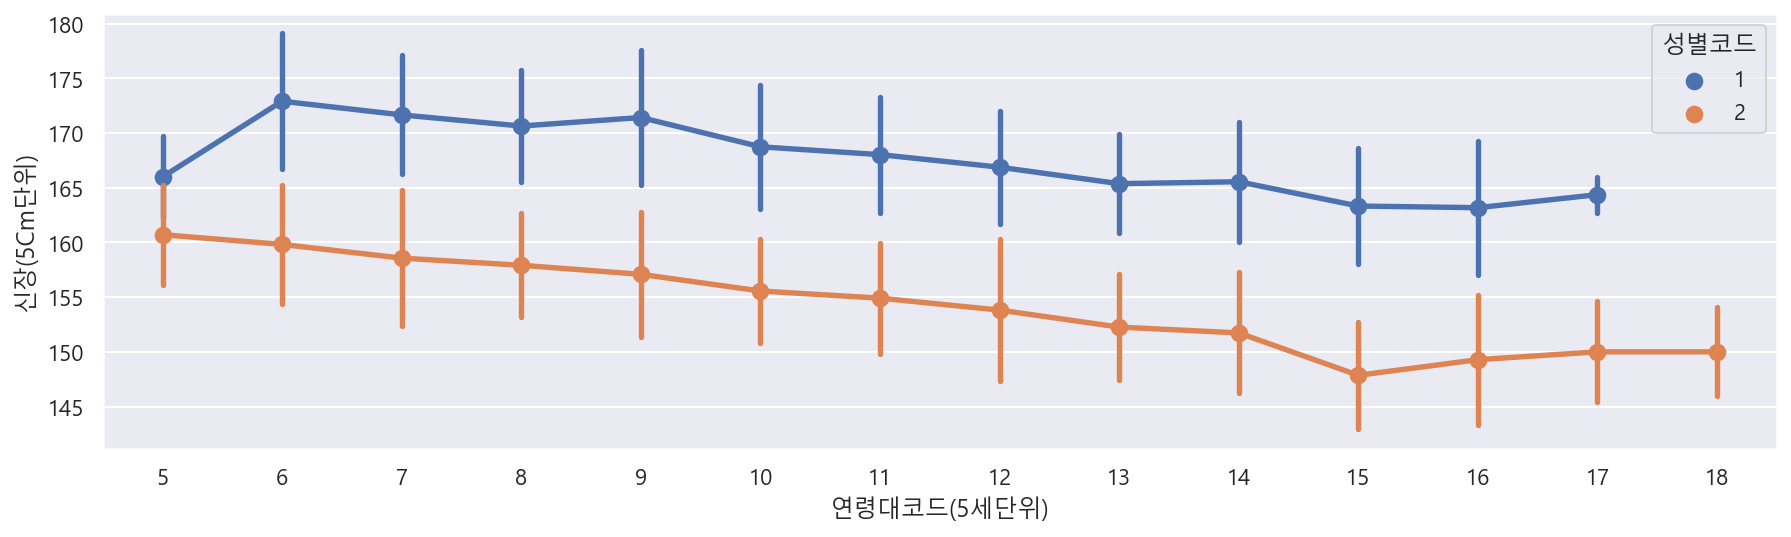

In [52]:
# 연령대코드(5세단위)에 따른 신장(5Cm단위)을 성별코드에 따라 pointplot과 barplot으로 그리기
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

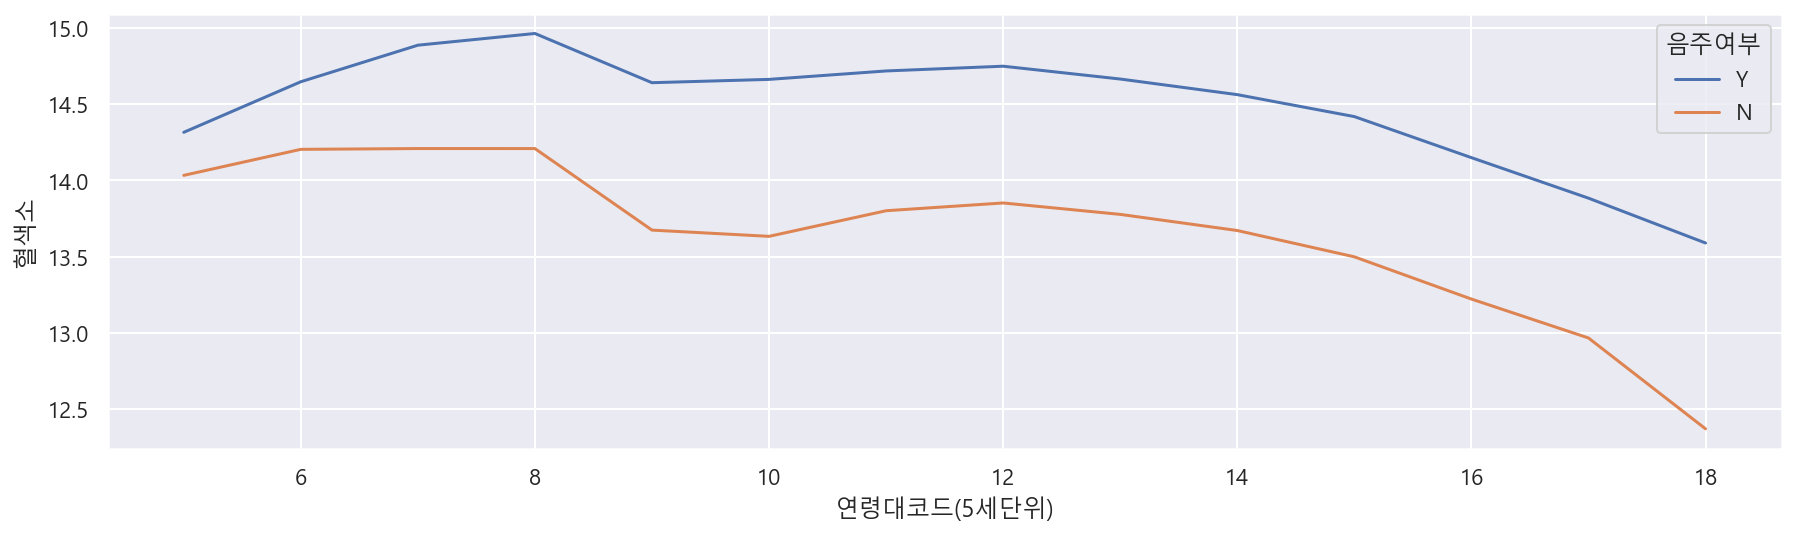

In [53]:
# 연령대코드(5세단위)에 따른 혈색소를 음주여부에 따라 lineplot으로 그리기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)
# 연령대가 커질수록 혈색소가 줄어들고 있음

## boxplot
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그림
* 5가지 요약 수치 : 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미함
* 위 그래프보다 값을 더 자세하게 표현

1. 최솟값
2. 제 1사분위수
3. 제 2사분위수(), 즉 중앙값
4. 제 3사분위수()
5. 최댓값
6. Box plot 이해하기

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

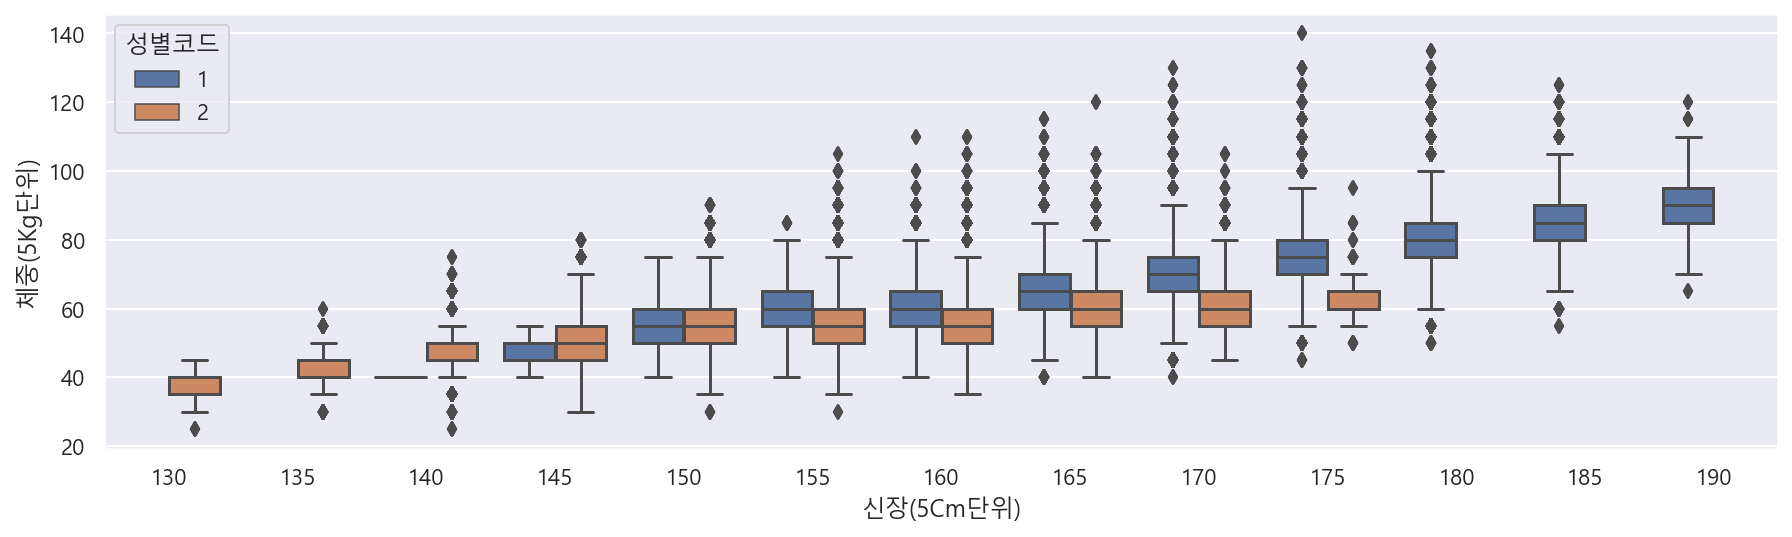

In [54]:
# boxplot으로 신장(5Cm단위) 에 따른 체중(5Kg 단위)을 그리며, 성별코드에 따라 다른 색상으로 표현되게 함
# 다이아몬드 : 이상치를 의미
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")

## violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

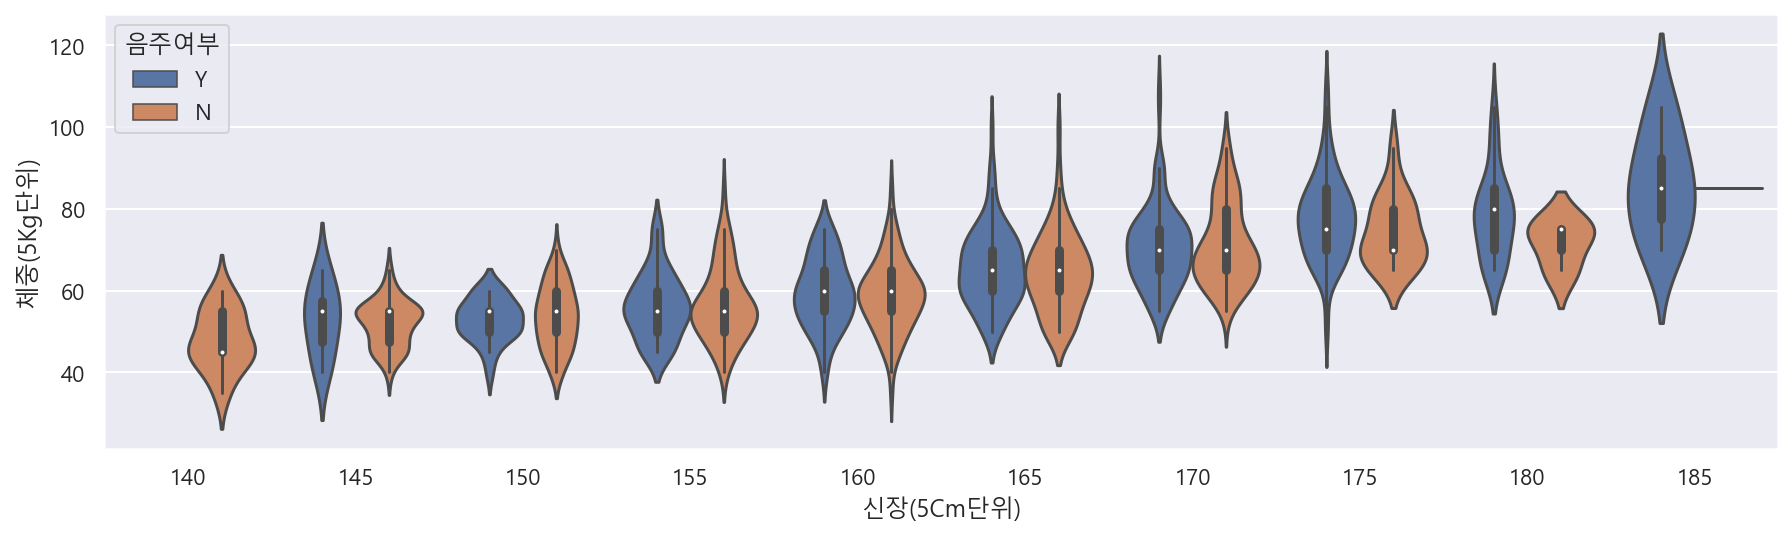

In [55]:
# violinplot 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며, 음주여부에 따라 다른 색상으로 표현하게 됨
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample,  x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

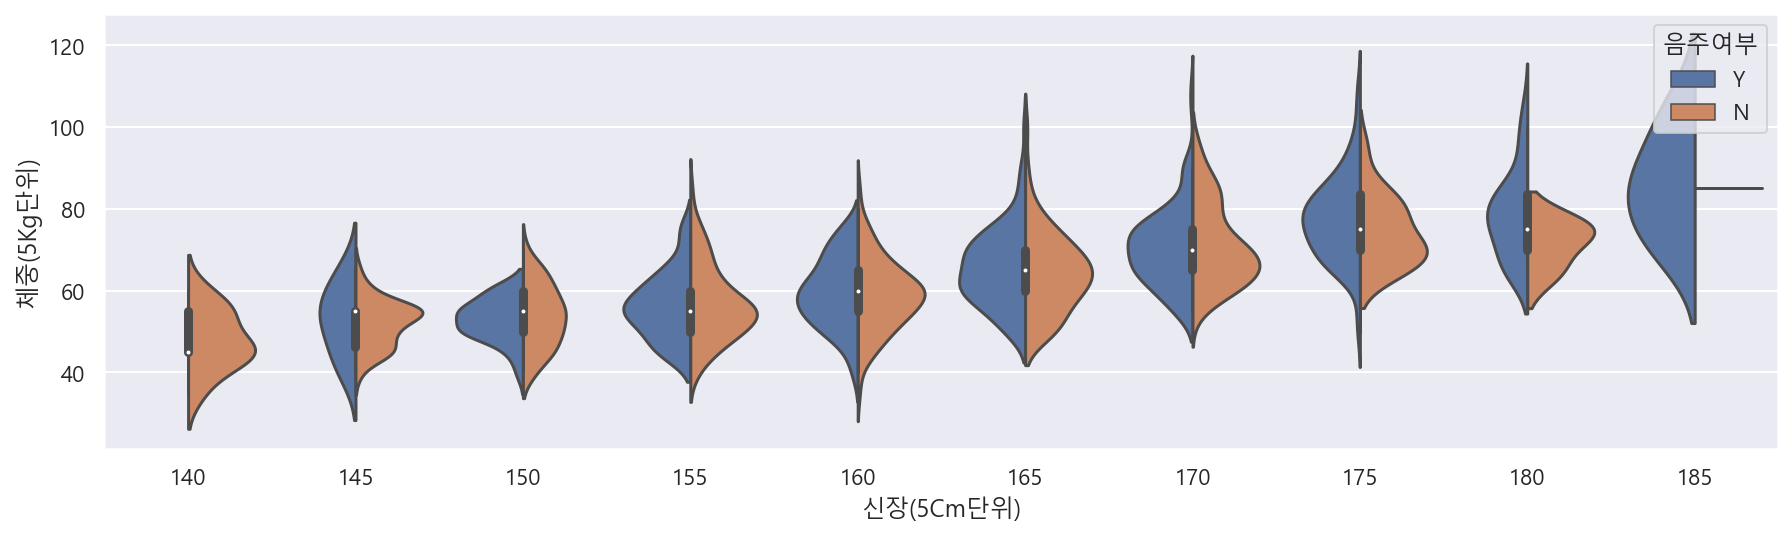

In [56]:
# violinplot의 split 기능을 사용하기 -> 두 개의 값을 하나의 그래프에 붙여서 표현
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample,  x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", split=True)
# 전반적으로 음주하고 있는 사람들은 분포가 더 넓게 퍼져있음

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

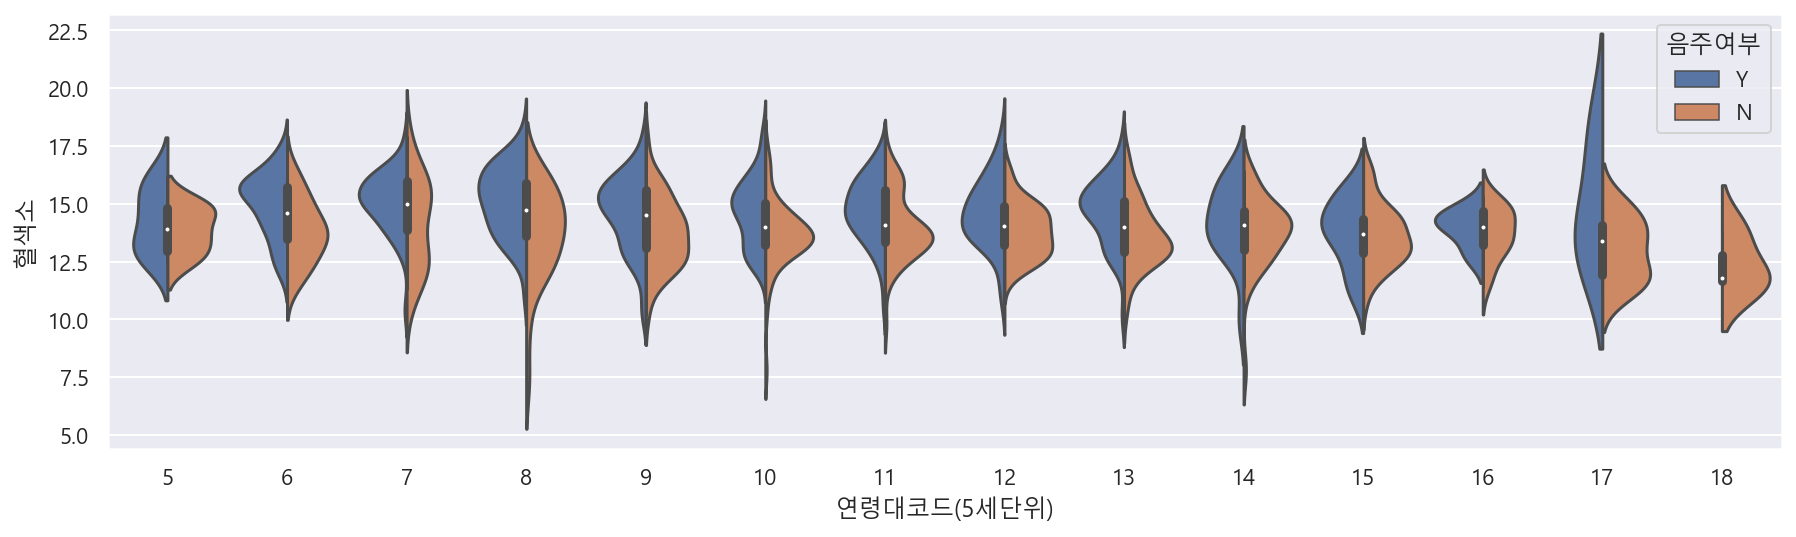

In [57]:
# violinplot 연령대코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표현하게 됨
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample,  x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)
# 음주하고 있는 사람이 혈색소가 높은 것을 알 수 있음

## swarm plot
* 범주형 데이터를 산점도로 시각화하고자 할 때 사용함

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.2% of the points canno

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

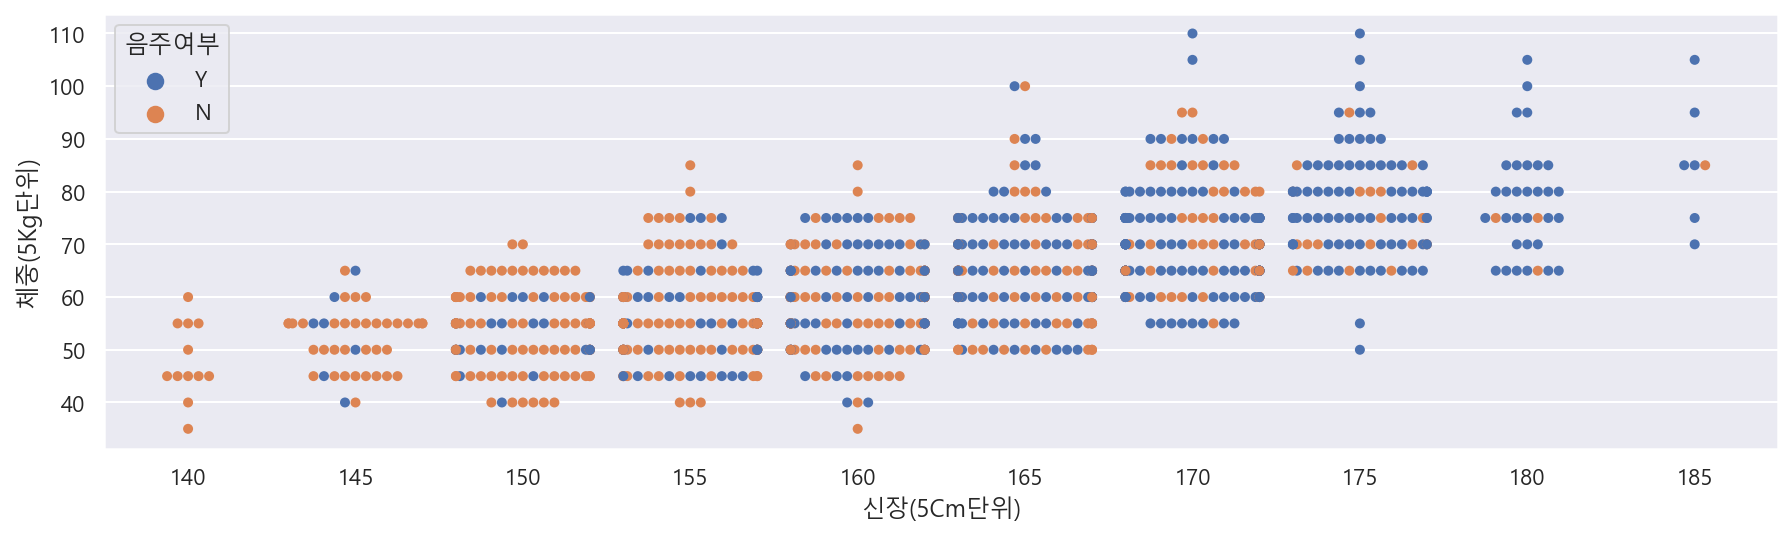

In [58]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며, 음주여부에 따라 다른 색상으로 표현되게 함
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그리기
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample,  x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")
# sns.violinplot(data=df_sample,  x="신장(5Cm단위)", y="체중(5Kg단위)") # violinplot과 같이 그릴 수 있음

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot 

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

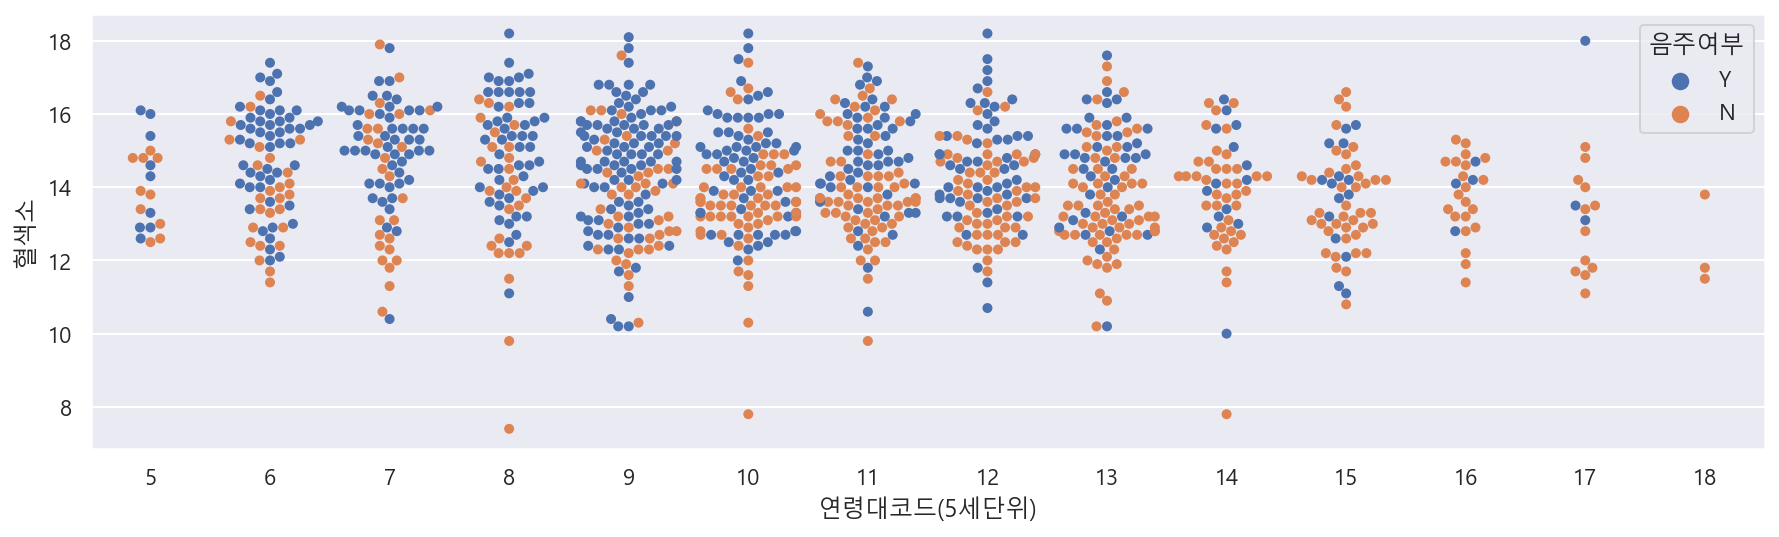

In [59]:
# swarmplot으로 연령대코드(5세단위)에 따른 음주여부를 그리며, 성별코드에 따라 다른 색상으로 표현되게 함
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample,  x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

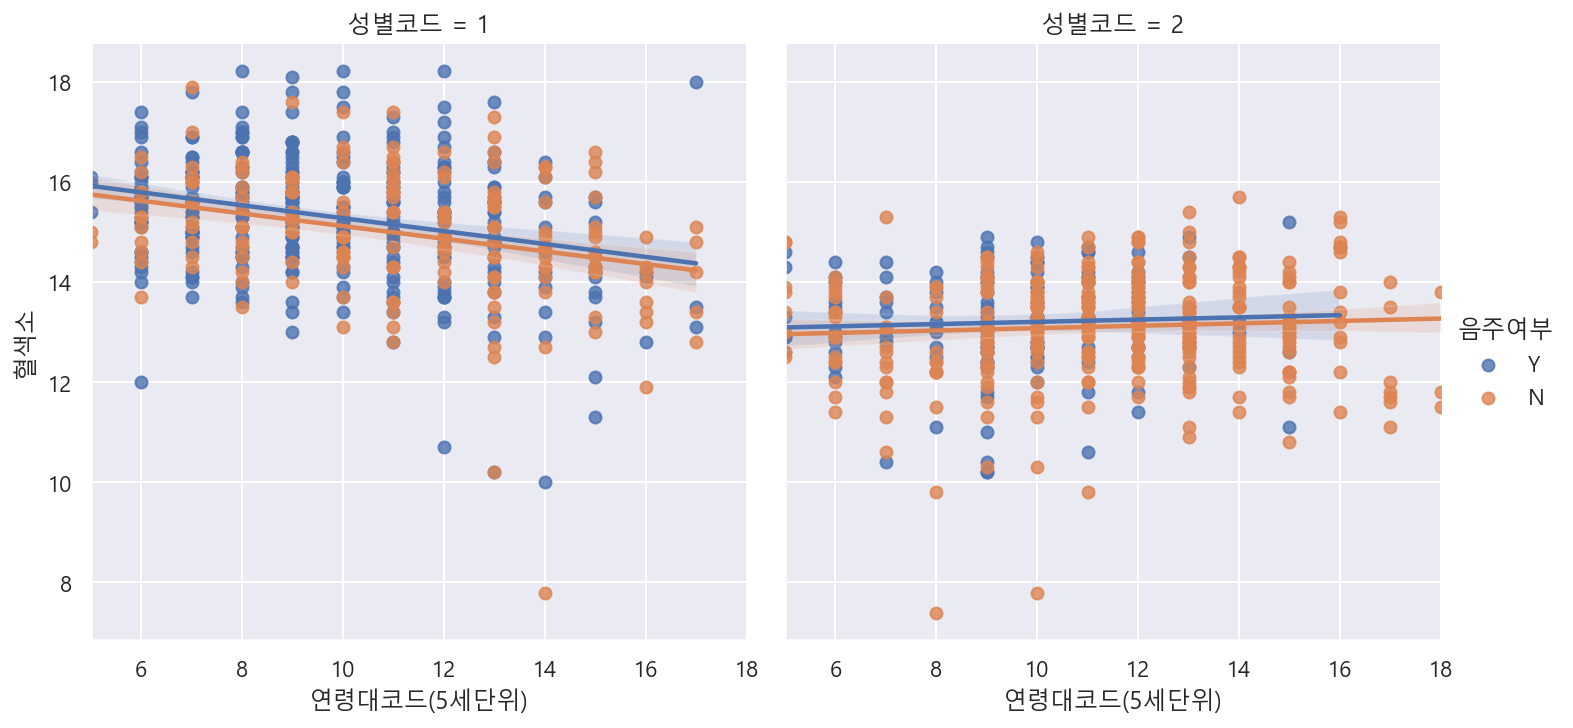

In [60]:
# lmplot으로 그리기 - 회귀선을 바탕으로 x축과 y축의 상관관계를 알아봄
# 장점 : 여러 개의 값을 subplot으로 표현 가능
# col : hue값에 따라서 column을 다르게 표현할 수 있음
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드") 

# 수치형 데이터 시각화

## scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용
* 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있음

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

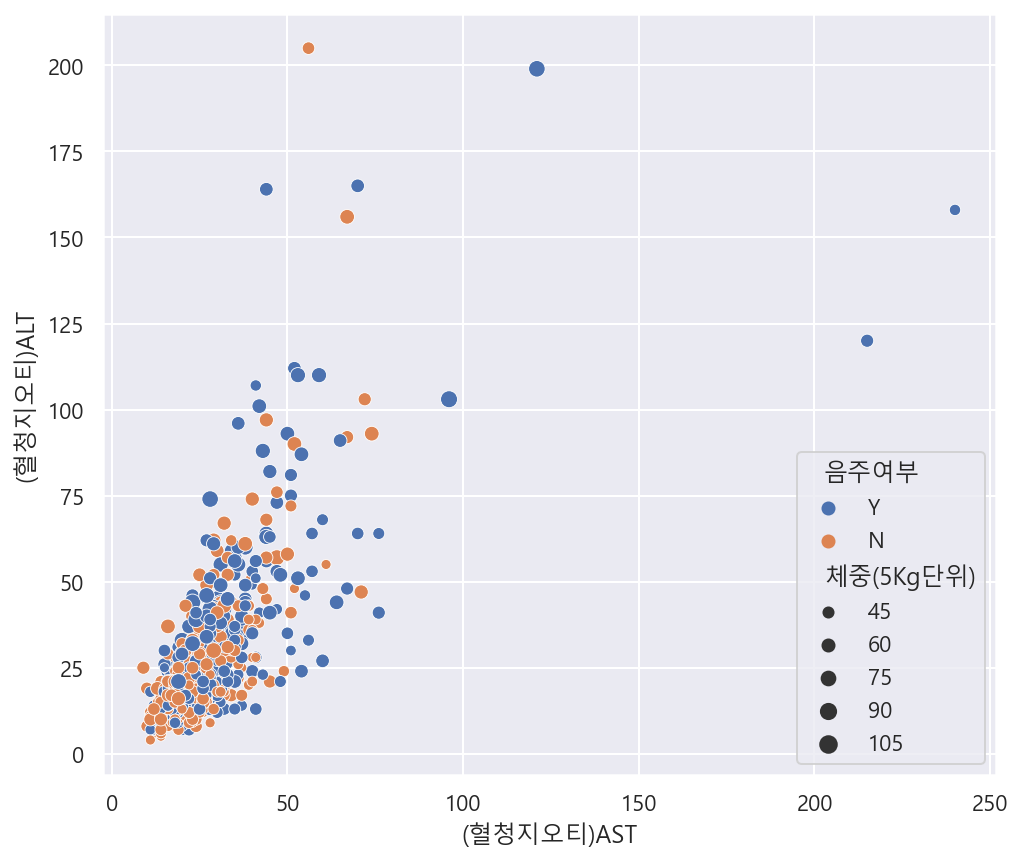

In [61]:
# scatterplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색상으로 표현
# x축, y축 모두 수치형 데이터
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg단위)") # 체중에 따라서 원의 크기를 다르게 표현할 수 있음

## Implot - 상관 관계를 보기

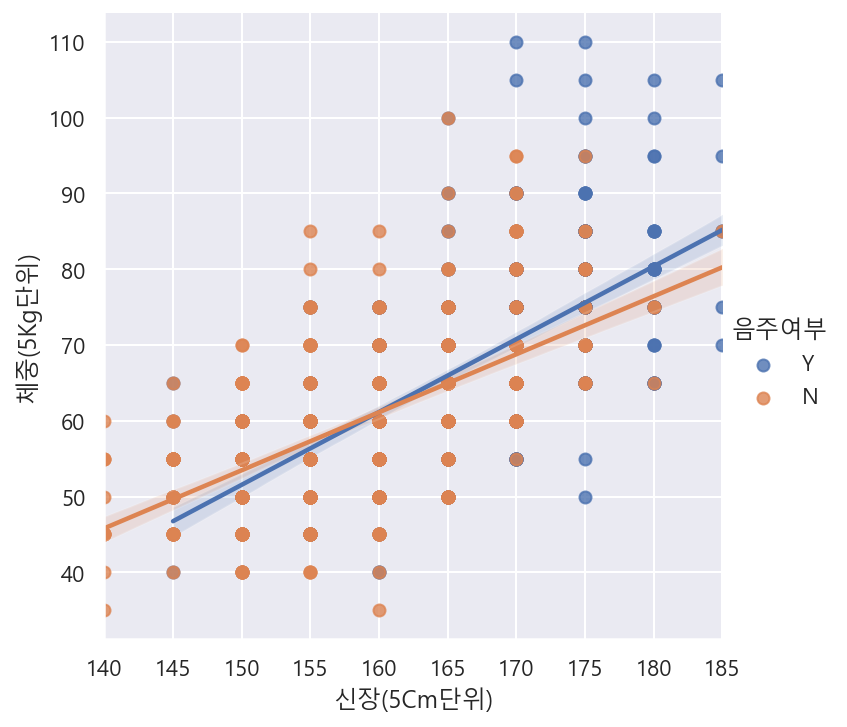

In [62]:
# Implot으로 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며, 음주여부에 따라 다른 색상으로 표현되기 함
# 장점 : 여러 카테고리의 값에 따라서 서브플롯을 그려볼 수 있음
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

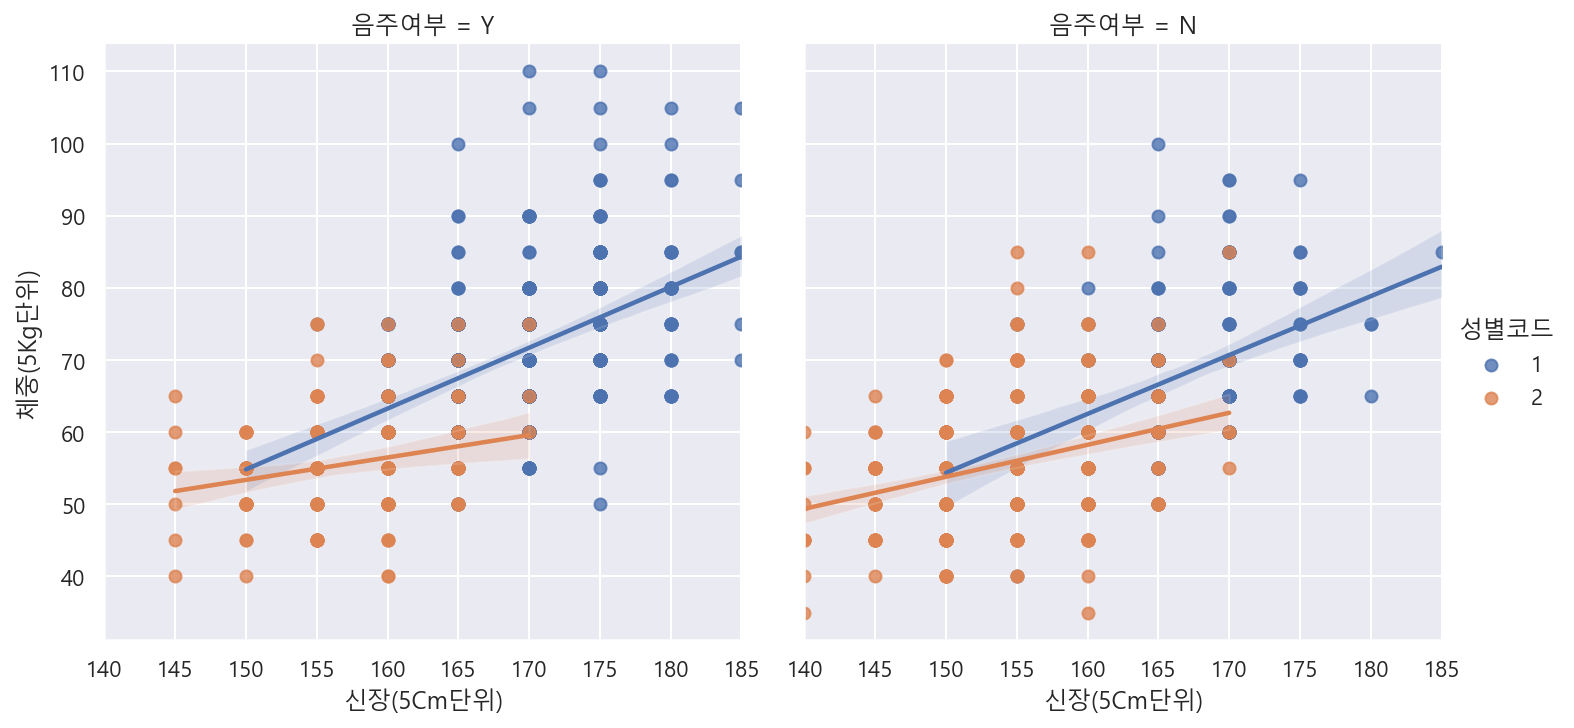

In [63]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯을 그리기
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드", col="음주여부")

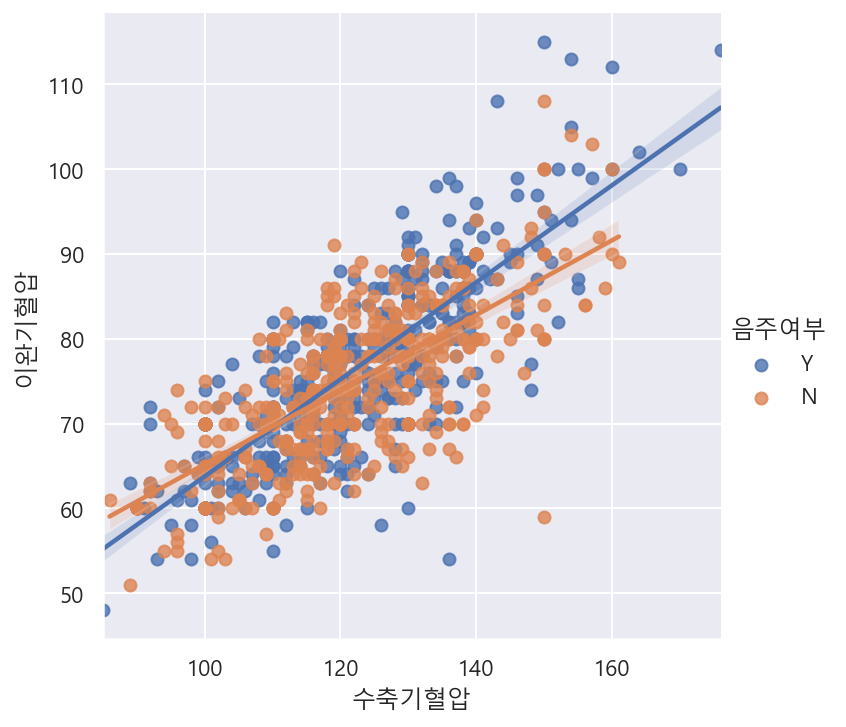

In [64]:
# lmplot으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")

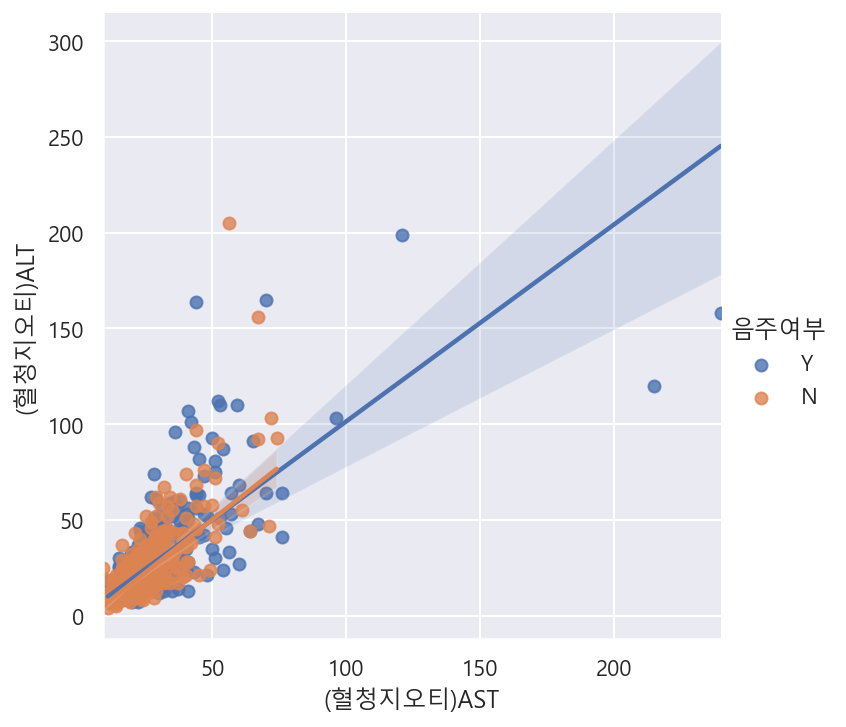

In [65]:
# lmplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색상으로 표현
# robust : 이상치의 값이 영향을 적게 받게 그려줌
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

## 이상치 다루기
* 이상치가 있으면 데이터가 자세히 보이지 않거나 회귀선이 달라지기도 함
* 시각화를 통해 찾은 이상치를 제거하려고 보거나 이상치만 따로 모아 보도록 함

In [66]:
# "(혈청지오티)AST"와 "(혈청지오티)ALT"가 400 이하인 값만 데이터프레임 형태로 추출해서 df_ASLT 라는 변수에 담기
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]
df_ASLT

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
276826,2017,276827,1,12,41,160,55,77.0,0.9,0.9,...,38.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
849425,2017,849426,1,9,31,170,75,89.9,1.0,1.0,...,28.0,3.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
504499,2017,504500,1,8,42,170,75,86.3,1.5,1.5,...,121.0,3.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
601054,2017,601055,1,14,31,170,70,84.0,0.8,0.9,...,31.0,3.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
980221,2017,980222,1,17,41,160,60,86.0,0.7,0.5,...,28.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,2017,890014,2,8,41,155,80,98.0,0.2,0.2,...,39.0,1.0,N,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
875389,2017,875390,1,11,41,170,60,81.0,1.0,0.9,...,59.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
358458,2017,358459,1,9,11,170,90,101.0,1.2,1.2,...,41.0,2.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
808228,2017,808229,1,11,28,160,65,85.0,0.6,0.9,...,37.0,2.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


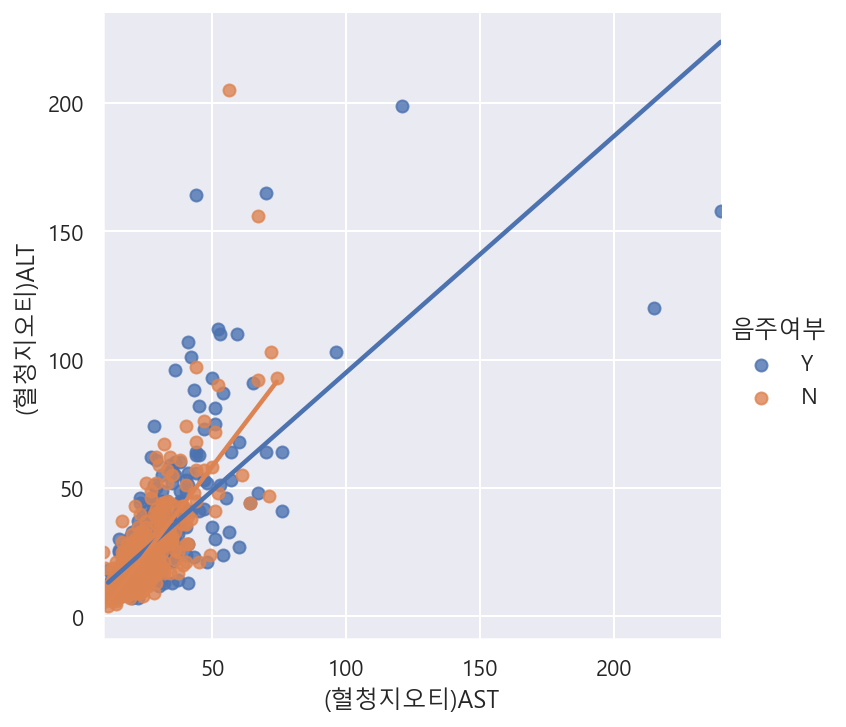

In [67]:
# 이상치를 제거한 "(혈청지오티)AST"와 "(혈청지오티)ALT"를 lmplot으로 그리며 음주여부에 따라 다른 색으로 표현
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [68]:
# "(혈청지오티)AST"와 "(혈청지오티)ALT"가 400 이상인 값만 데이터프레임 형태로 추출해서 df_ASLT 라는 변수에 담기
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)] # df_sample 데이터에는 없음
df_ASLT_high

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
4754,2017,4755,1,9,41,170,55,74.0,1.0,0.7,...,125.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
15820,2017,15821,2,13,45,150,55,83.0,0.6,1.2,...,999.0,1.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
17830,2017,17831,2,8,41,150,50,64.6,1.2,1.2,...,111.0,3.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
19949,2017,19950,1,6,41,170,105,103.0,1.0,1.2,...,133.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
26464,2017,26465,1,7,41,175,70,82.0,1.2,1.2,...,169.0,1.0,N,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982305,2017,982306,2,16,28,155,50,79.3,0.4,0.7,...,71.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
990867,2017,990868,2,11,41,145,45,75.0,0.9,1.2,...,279.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
991226,2017,991227,1,6,42,170,80,81.0,0.7,0.8,...,49.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
992747,2017,992748,2,10,41,165,40,58.0,0.9,0.7,...,777.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


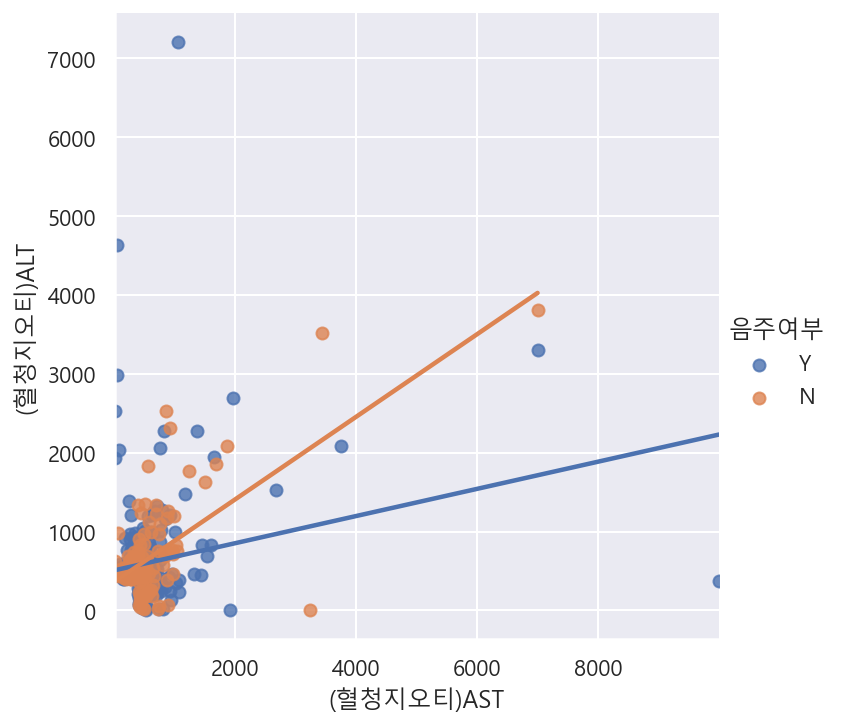

In [69]:
# 위에서 구한 df_ASLT_high 데이터 프레임에 담겨진 혈청지오티가 높은 데이터만 따로 봄
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [70]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
541757,1.0,1.0,96.0,74.0,93.0,161.0,67.0,78.0,69.0,15.4,1.0,1.2,9999.0,380.0,419.0,3.0,Y


## distplot

In [71]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [78]:
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol.head()

0    193.0
1    228.0
2    136.0
3    201.0
4    199.0
Name: 총콜레스테롤, dtype: float64

In [82]:
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

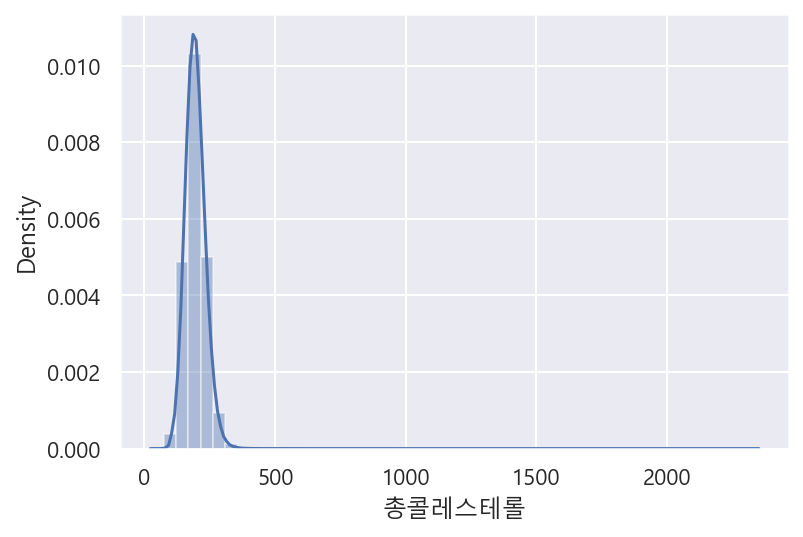

In [81]:
# "총콜레스테롤"에 따른 distplot을 그리기
sns.distplot(df_chol) # bins : 막대기 개수
# 오른쪽에 이상치가 있는 것을 확인할 수 있음

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

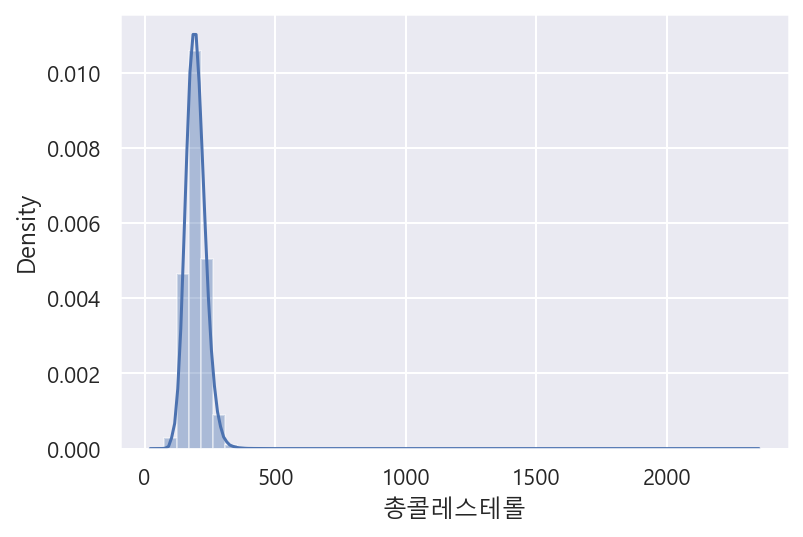

In [126]:
# 음주여부가 1인 값에 대한 "총콜레스테롤" 을 distplot으로 그리기
# displot을 사용할 때는 series 형태를 넣어야함
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == "Y"), # 행
    "총콜레스테롤"]) # 열

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

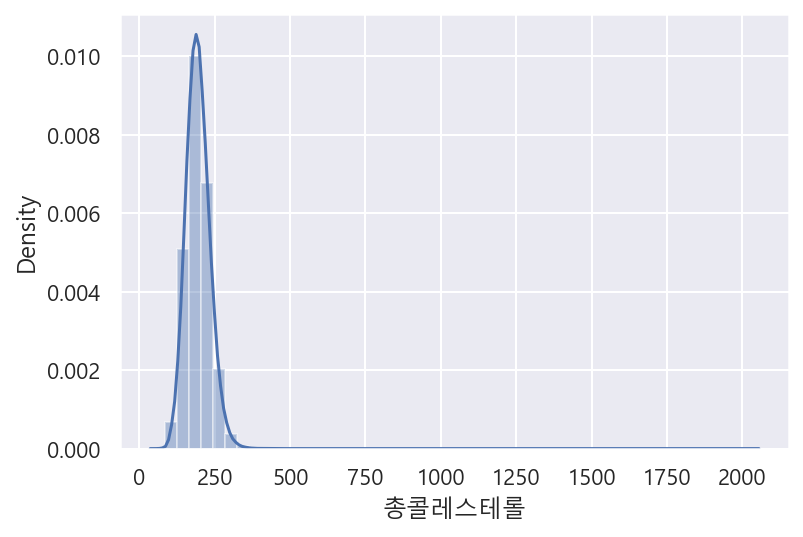

In [135]:
# 음주여부가 0인 값에 대한 "총콜레스테롤" 을 distplot으로 그리기
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == "N"), # 행
    "총콜레스테롤"]) # 열

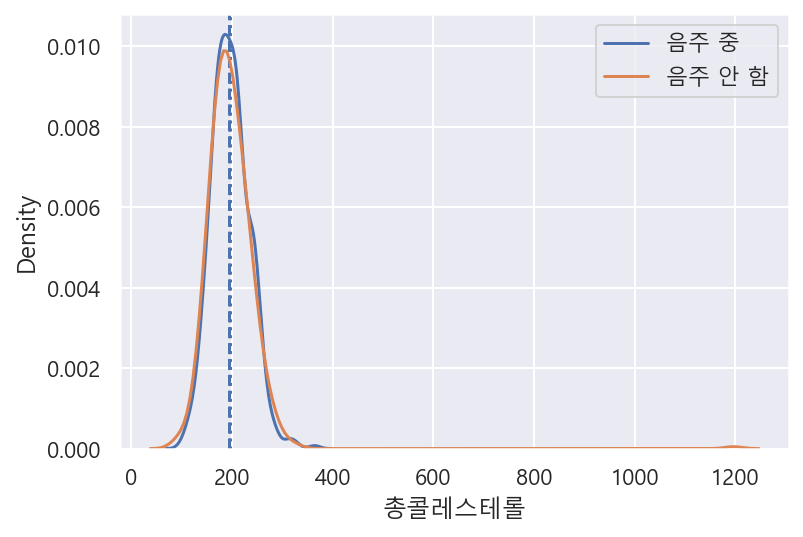

In [131]:
# 음주여부 값에 대한 "총콜레스테롤"을 distplot으로 그리며, 하나의 그래프에 표시되도록 함 (히스토그램 표시 안 함)
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":") # 그래프 가운데 평균값이 그려짐
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--") # 중앙값 표시
sns.kdeplot(df_sample.loc[
    df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == "Y"), # 행
    "총콜레스테롤"], label="음주 중") # 열
sns.kdeplot(df_sample.loc[
    df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == "N"), # 행
    "총콜레스테롤"], label="음주 안 함") # 열
plt.legend() # 라벨 표시

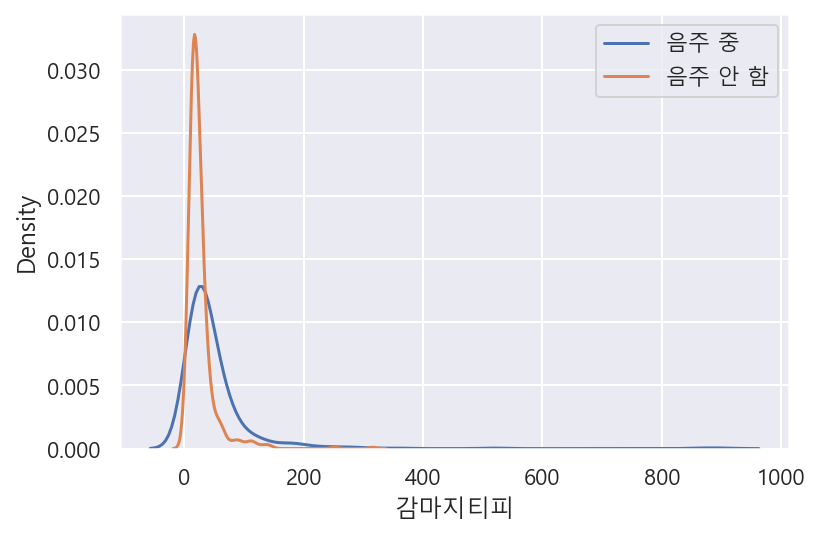

In [136]:
# 감마지티피 값에 따라 음주여부 시각화하기
s_1 = df_sample.loc[df_sample["음주여부"] == "Y", "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"] == "N", "감마지티피"]

sns.kdeplot(s_1, label="음주 중")
sns.kdeplot(s_0, label="음주 안 함")
plt.legend()

# 상관분석

In [137]:
# 상관계수에 사용할 컬럼을 변수에 담기
columns = ['연령대코드(5세단위)', '체중(5Kg단위)', '신장(5Cm단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
          '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
          '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

## 상관계수 구하기

In [141]:
# 샘플컬럼만 가져와서 df_small이라는 데이터프레임에 담은 뒤 상관계수를 구하기
df_small = df_sample[columns]
df_corr = df_small.corr() # default : 피어슨 상관계수
df_corr # 대각선은 모두 1 (자기 자신이기 때문에)

,연령대코드(5세단위),체중(5Kg단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태
연령대코드(5세단위),1.000000,-0.200336,-0.380239,0.159797,-0.217613,-0.308829,0.233960,0.264549,0.222408,0.091006,...,0.037474,-0.095972,0.008560,-0.178977,0.058702,0.044958,0.129357,-0.009871,-0.015357,-0.121132
체중(5Kg단위),-0.200336,1.000000,0.665067,0.785950,0.122194,0.168929,-0.043727,-0.047717,0.288983,0.324783,...,0.260689,-0.330577,0.043839,0.540191,0.012154,0.170468,0.193976,0.401756,0.246924,0.392874
신장(5Cm단위),-0.380239,0.665067,1.000000,0.312230,0.202426,0.236260,-0.064044,-0.074738,0.063929,0.157810,...,0.135087,-0.207537,0.008146,0.541155,-0.007699,0.212811,0.055783,0.159199,0.185091,0.512294
허리둘레,0.159797,0.785950,0.312230,1.000000,0.017355,0.030809,0.050644,0.073086,0.349219,0.329256,...,0.267643,-0.311478,0.017287,0.377673,0.045948,0.131421,0.253549,0.407063,0.234831,0.246296
시력(좌),-0.217613,0.122194,0.202426,0.017355,1.000000,0.346265,-0.039499,-0.081000,-0.012888,0.027854,...,0.032493,-0.045579,-0.052768,0.142582,-0.024741,0.022175,0.011212,0.080793,0.111903,0.141441
시력(우),-0.308829,0.168929,0.236260,0.030809,0.346265,1.000000,-0.072118,-0.102880,-0.036395,0.001282,...,0.070753,-0.068572,0.003336,0.190303,-0.024977,0.080797,0.003236,0.123455,0.035304,0.089486
청력(좌),0.233960,-0.043727,-0.064044,0.050644,-0.039499,-0.072118,1.000000,0.565295,0.039115,-0.015526,...,0.018695,-0.047898,0.006018,-0.000433,0.041231,0.016792,0.020671,0.044048,-0.025004,0.007413
청력(우),0.264549,-0.047717,-0.074738,0.073086,-0.081000,-0.102880,0.565295,1.000000,0.056661,-0.005658,...,0.034650,-0.069527,-0.032362,-0.050208,0.081749,0.017758,-0.004681,-0.019893,-0.024936,-0.042159
수축기혈압,0.222408,0.288983,0.063929,0.349219,-0.012888,-0.036395,0.039115,0.056661,1.000000,0.751731,...,0.233447,-0.093036,-0.007070,0.169241,0.043110,0.034018,0.133472,0.163762,0.191333,0.094145
이완기혈압,0.091006,0.324783,0.157810,0.329256,0.027854,0.001282,-0.015526,-0.005658,0.751731,1.000000,...,0.225436,-0.091701,0.038887,0.255690,0.035826,0.081965,0.131482,0.191155,0.200150,0.144974
